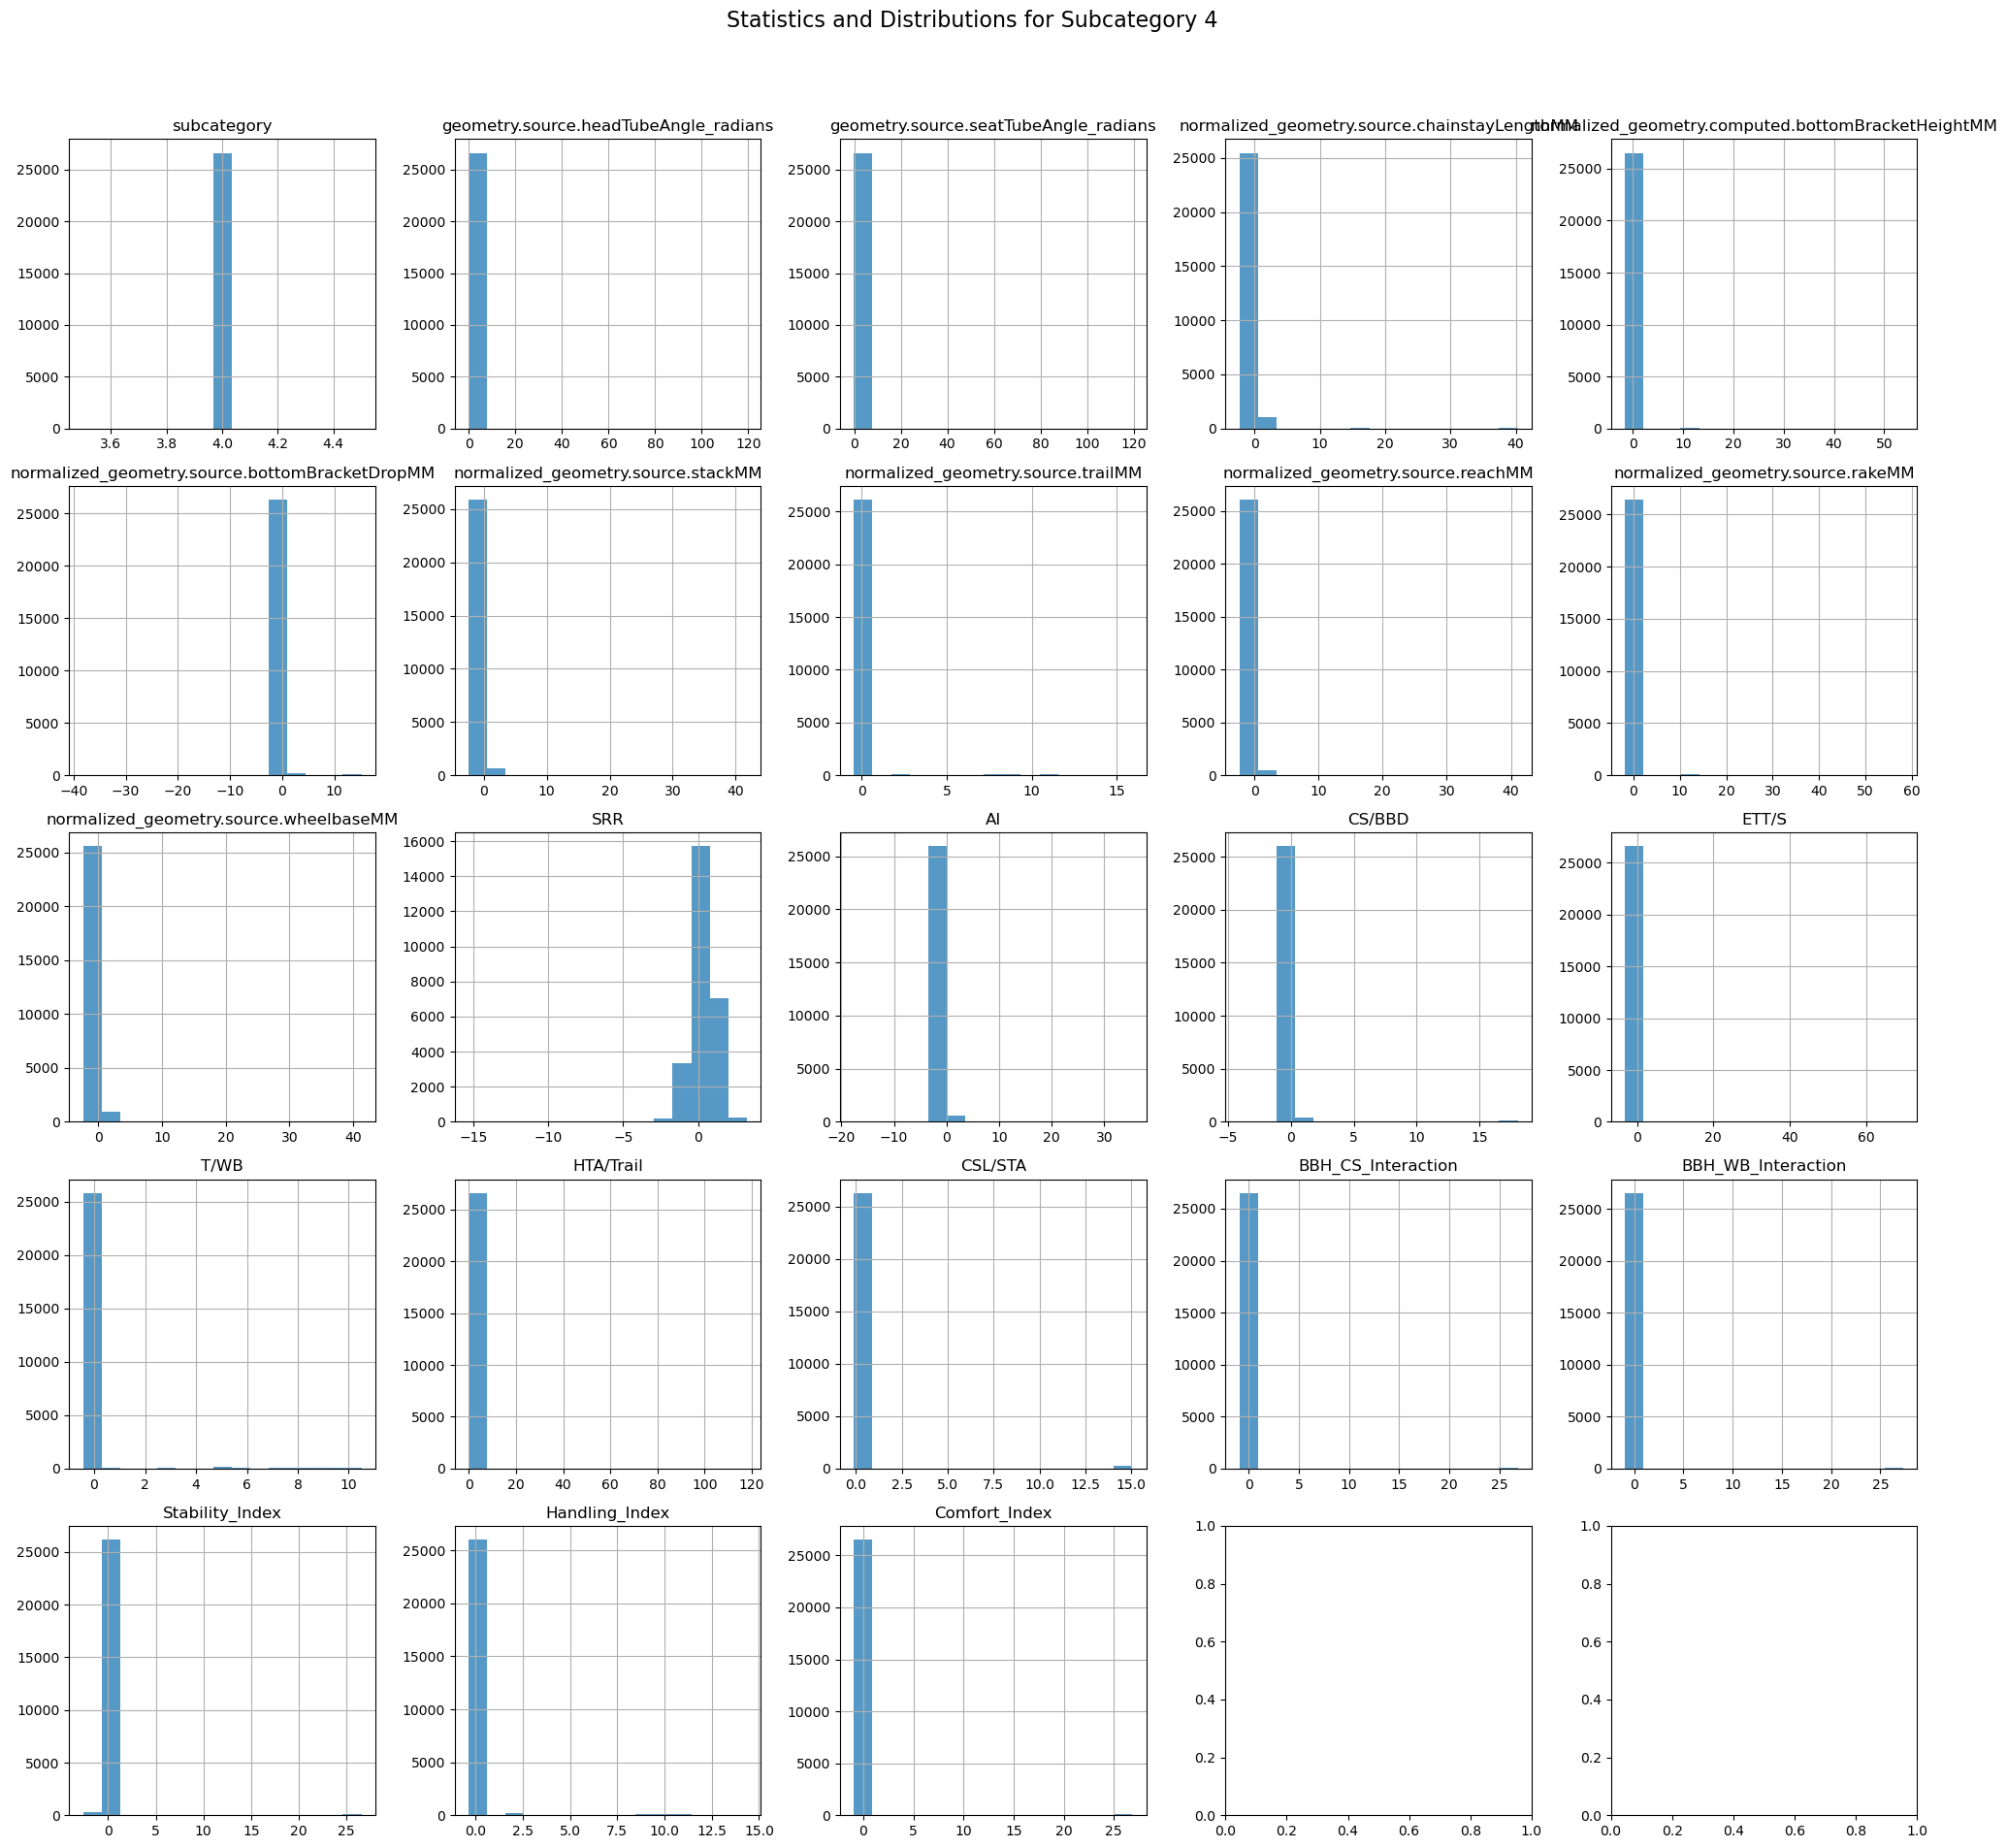

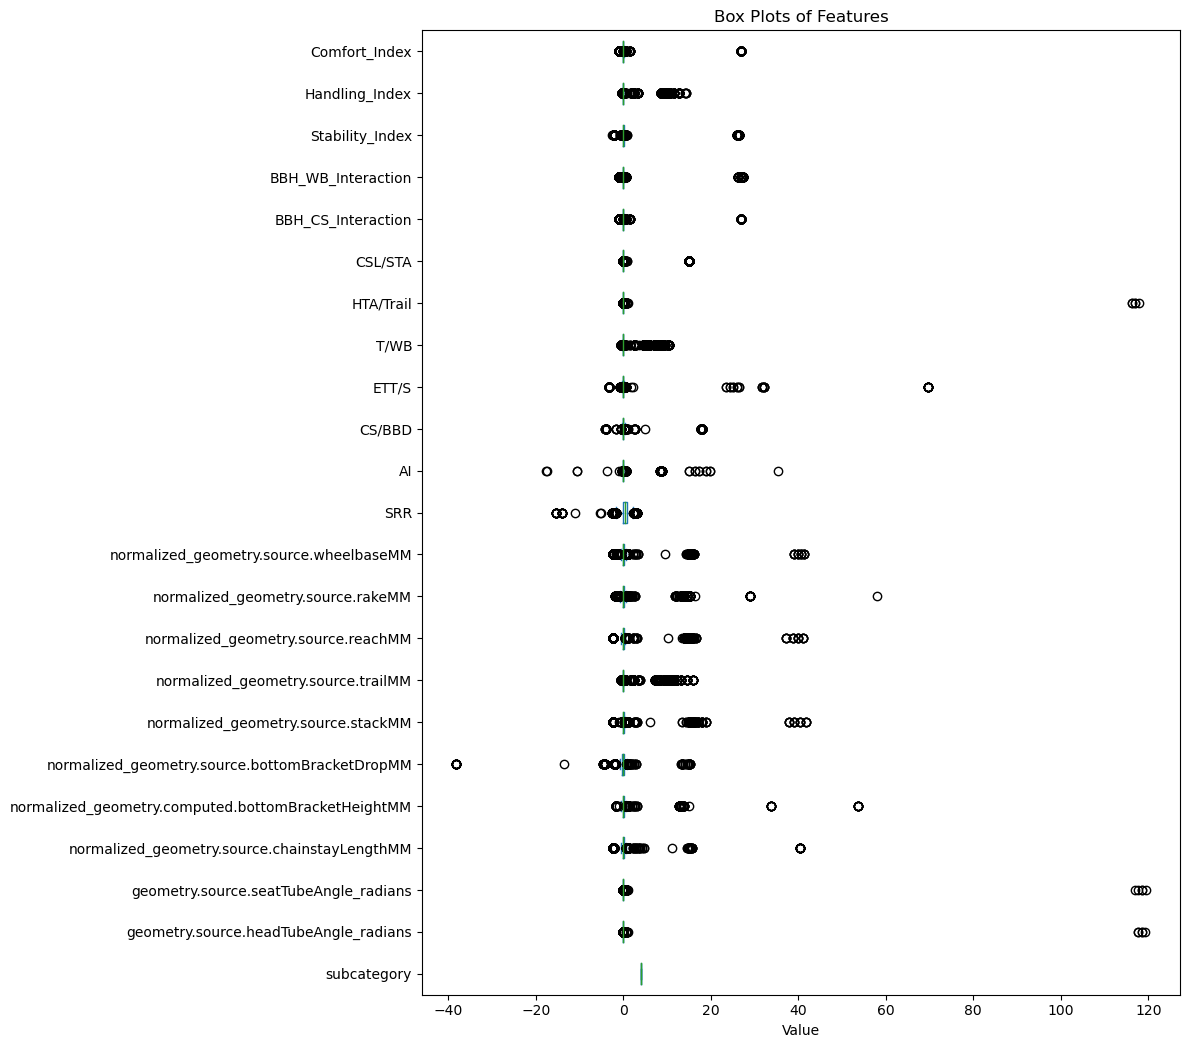

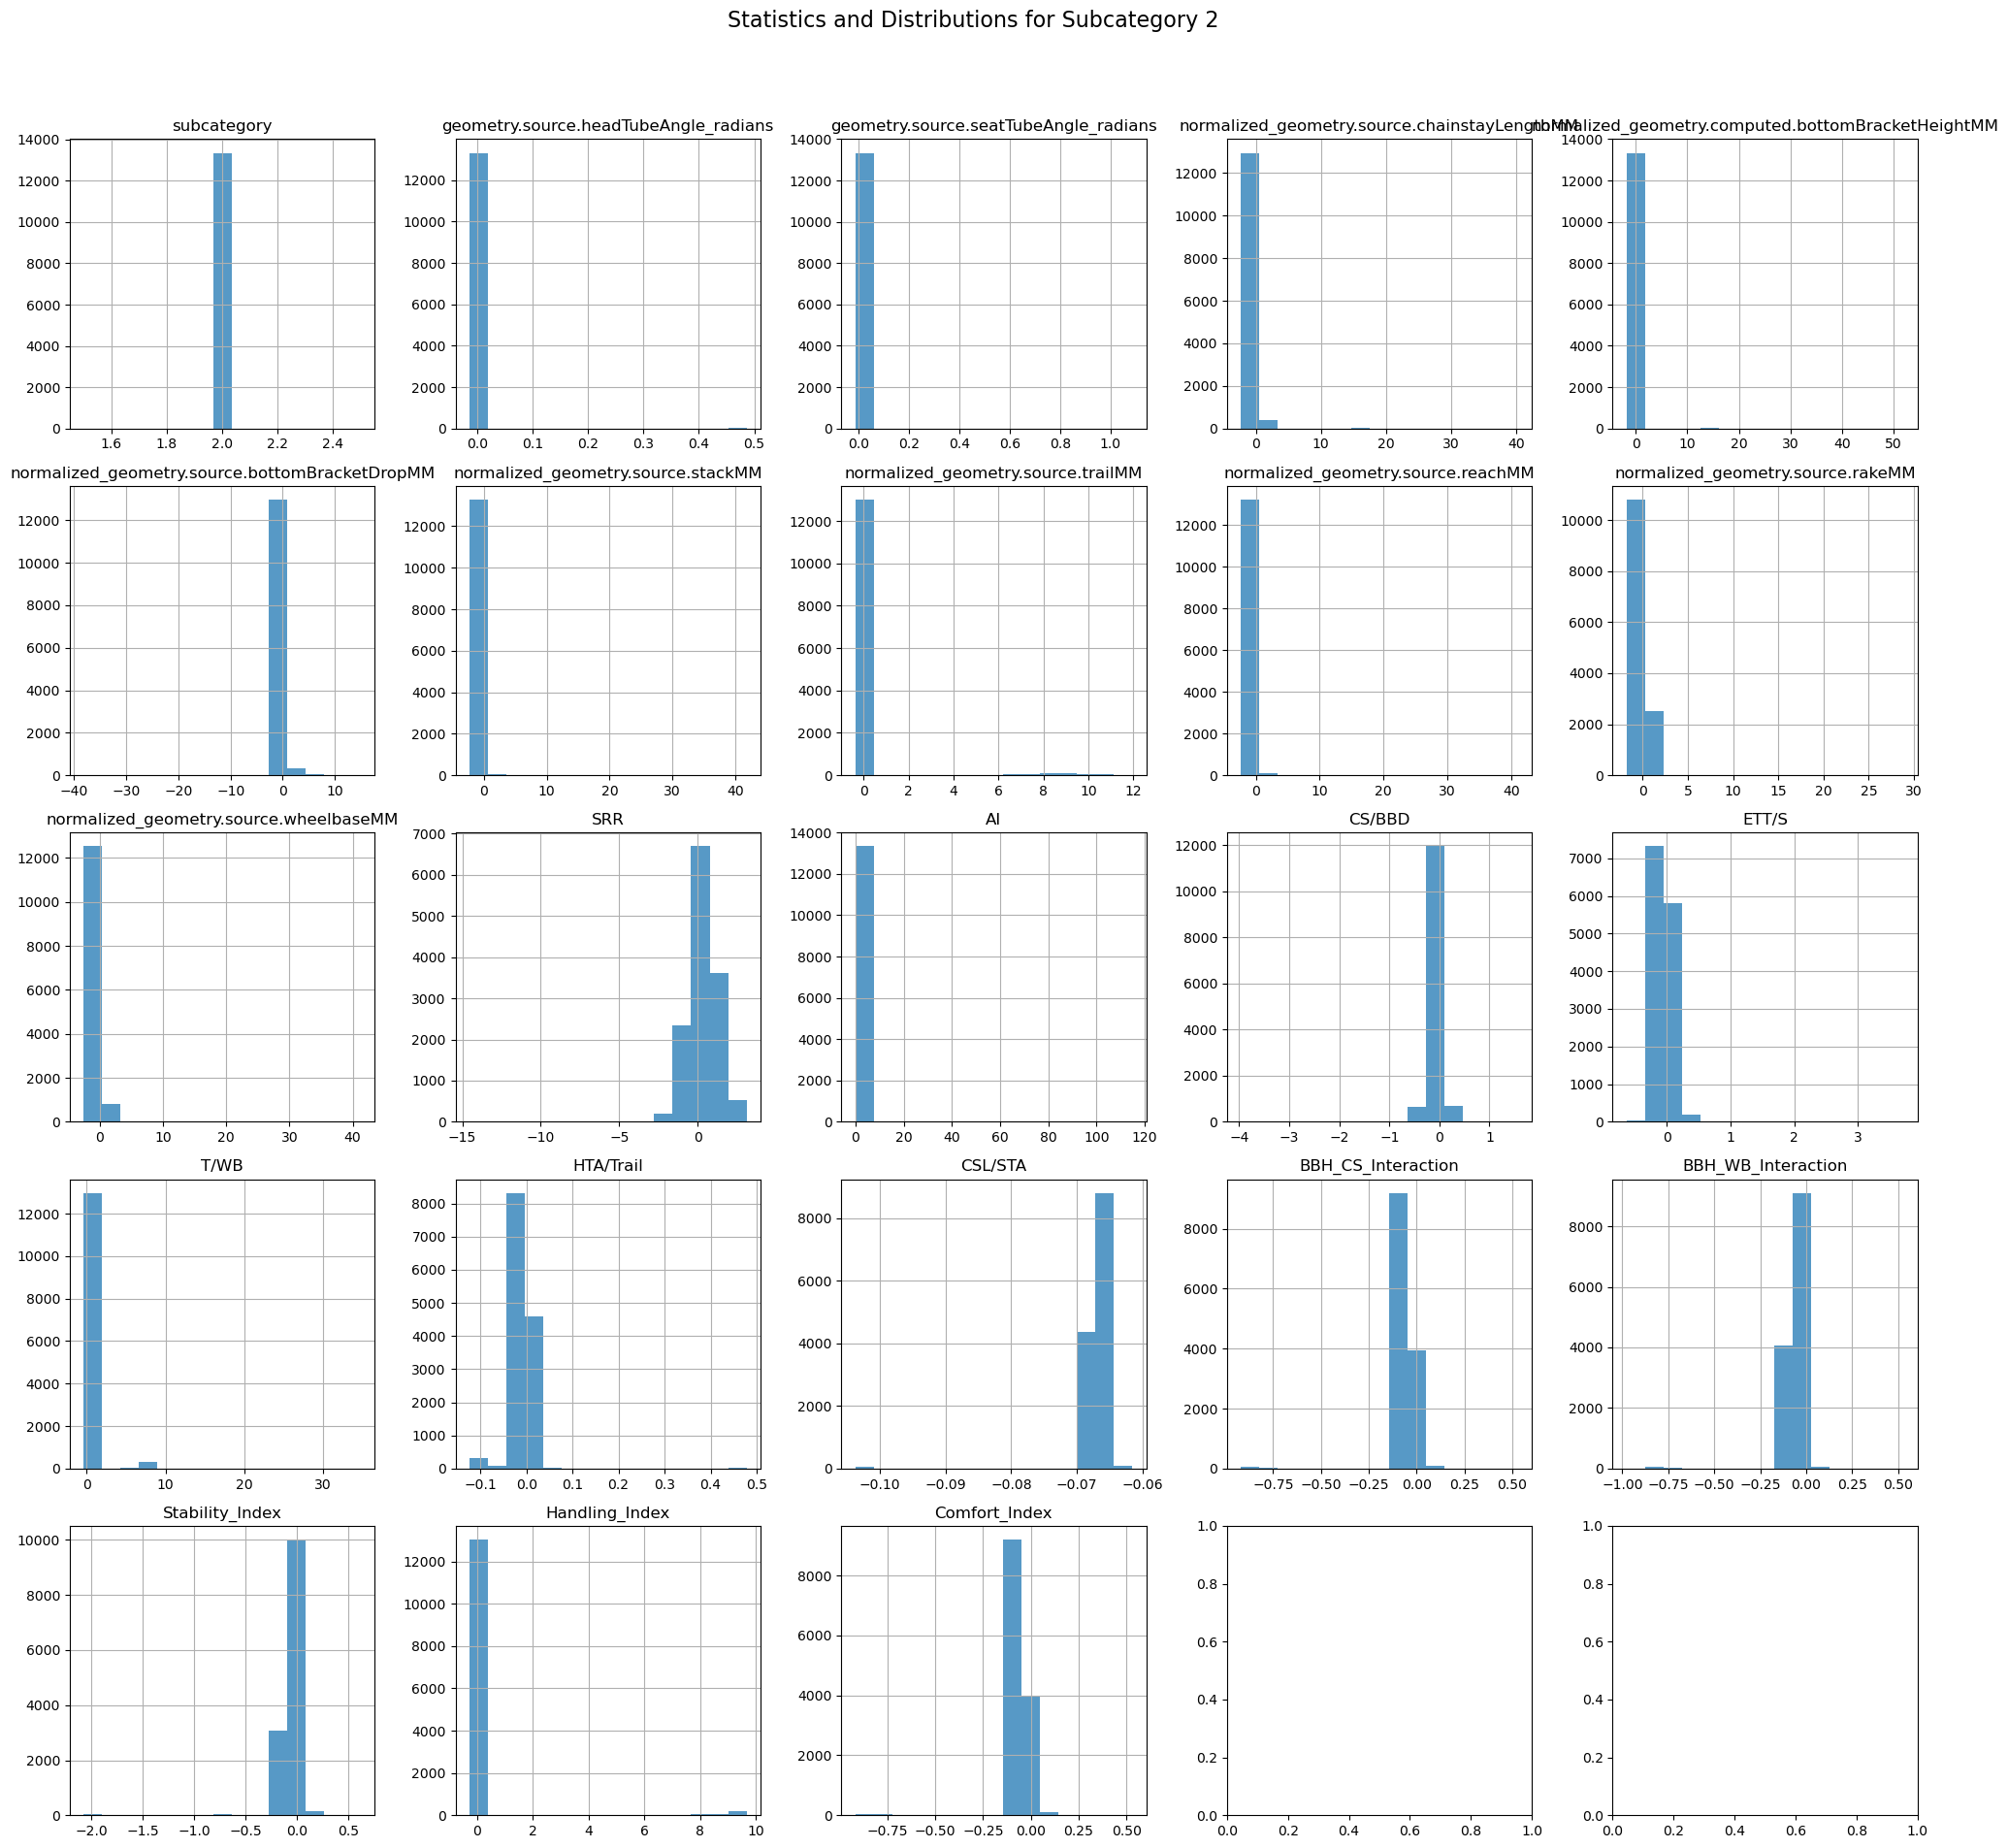

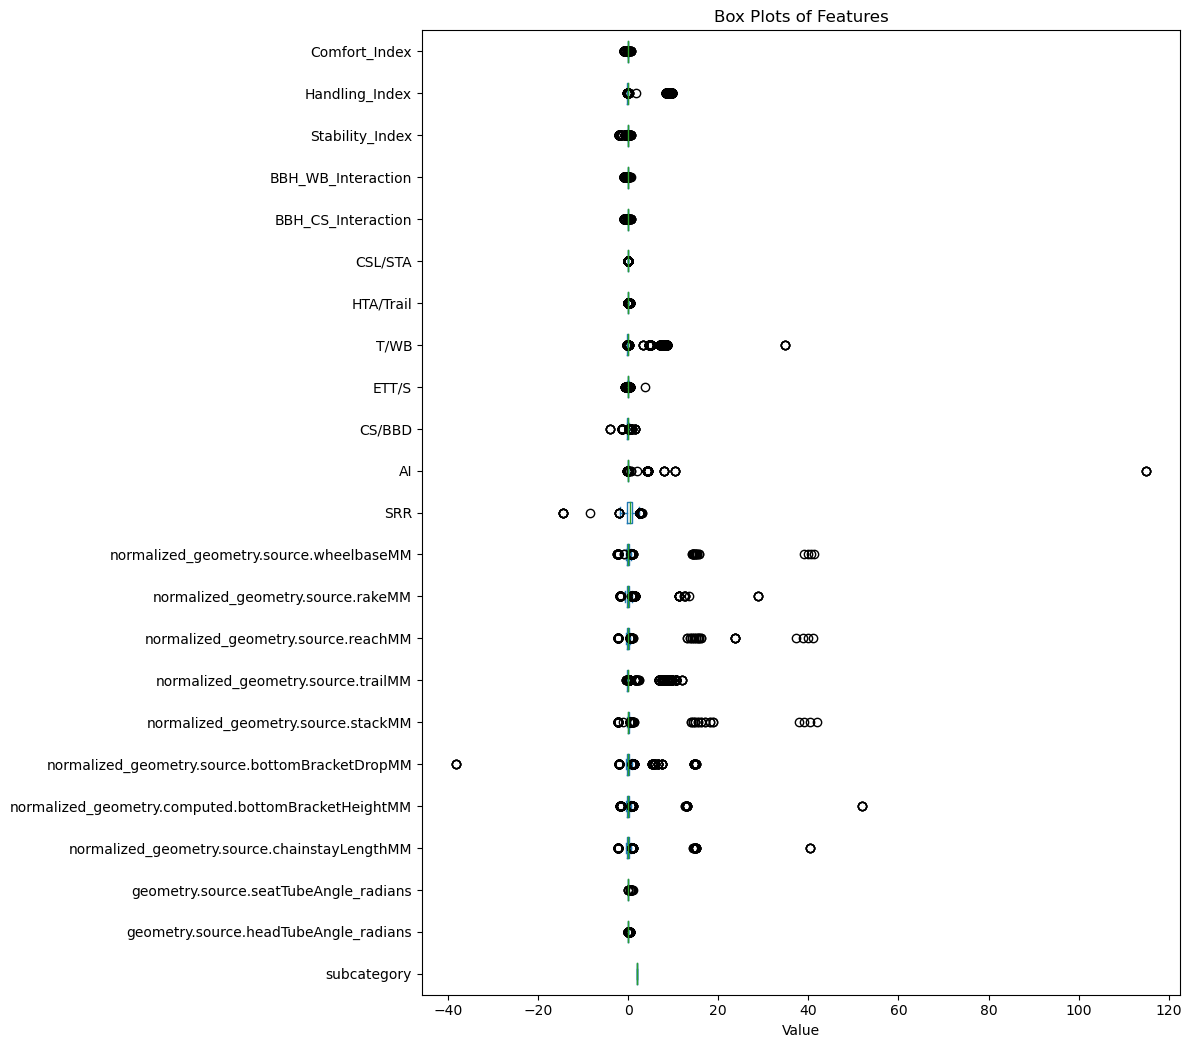

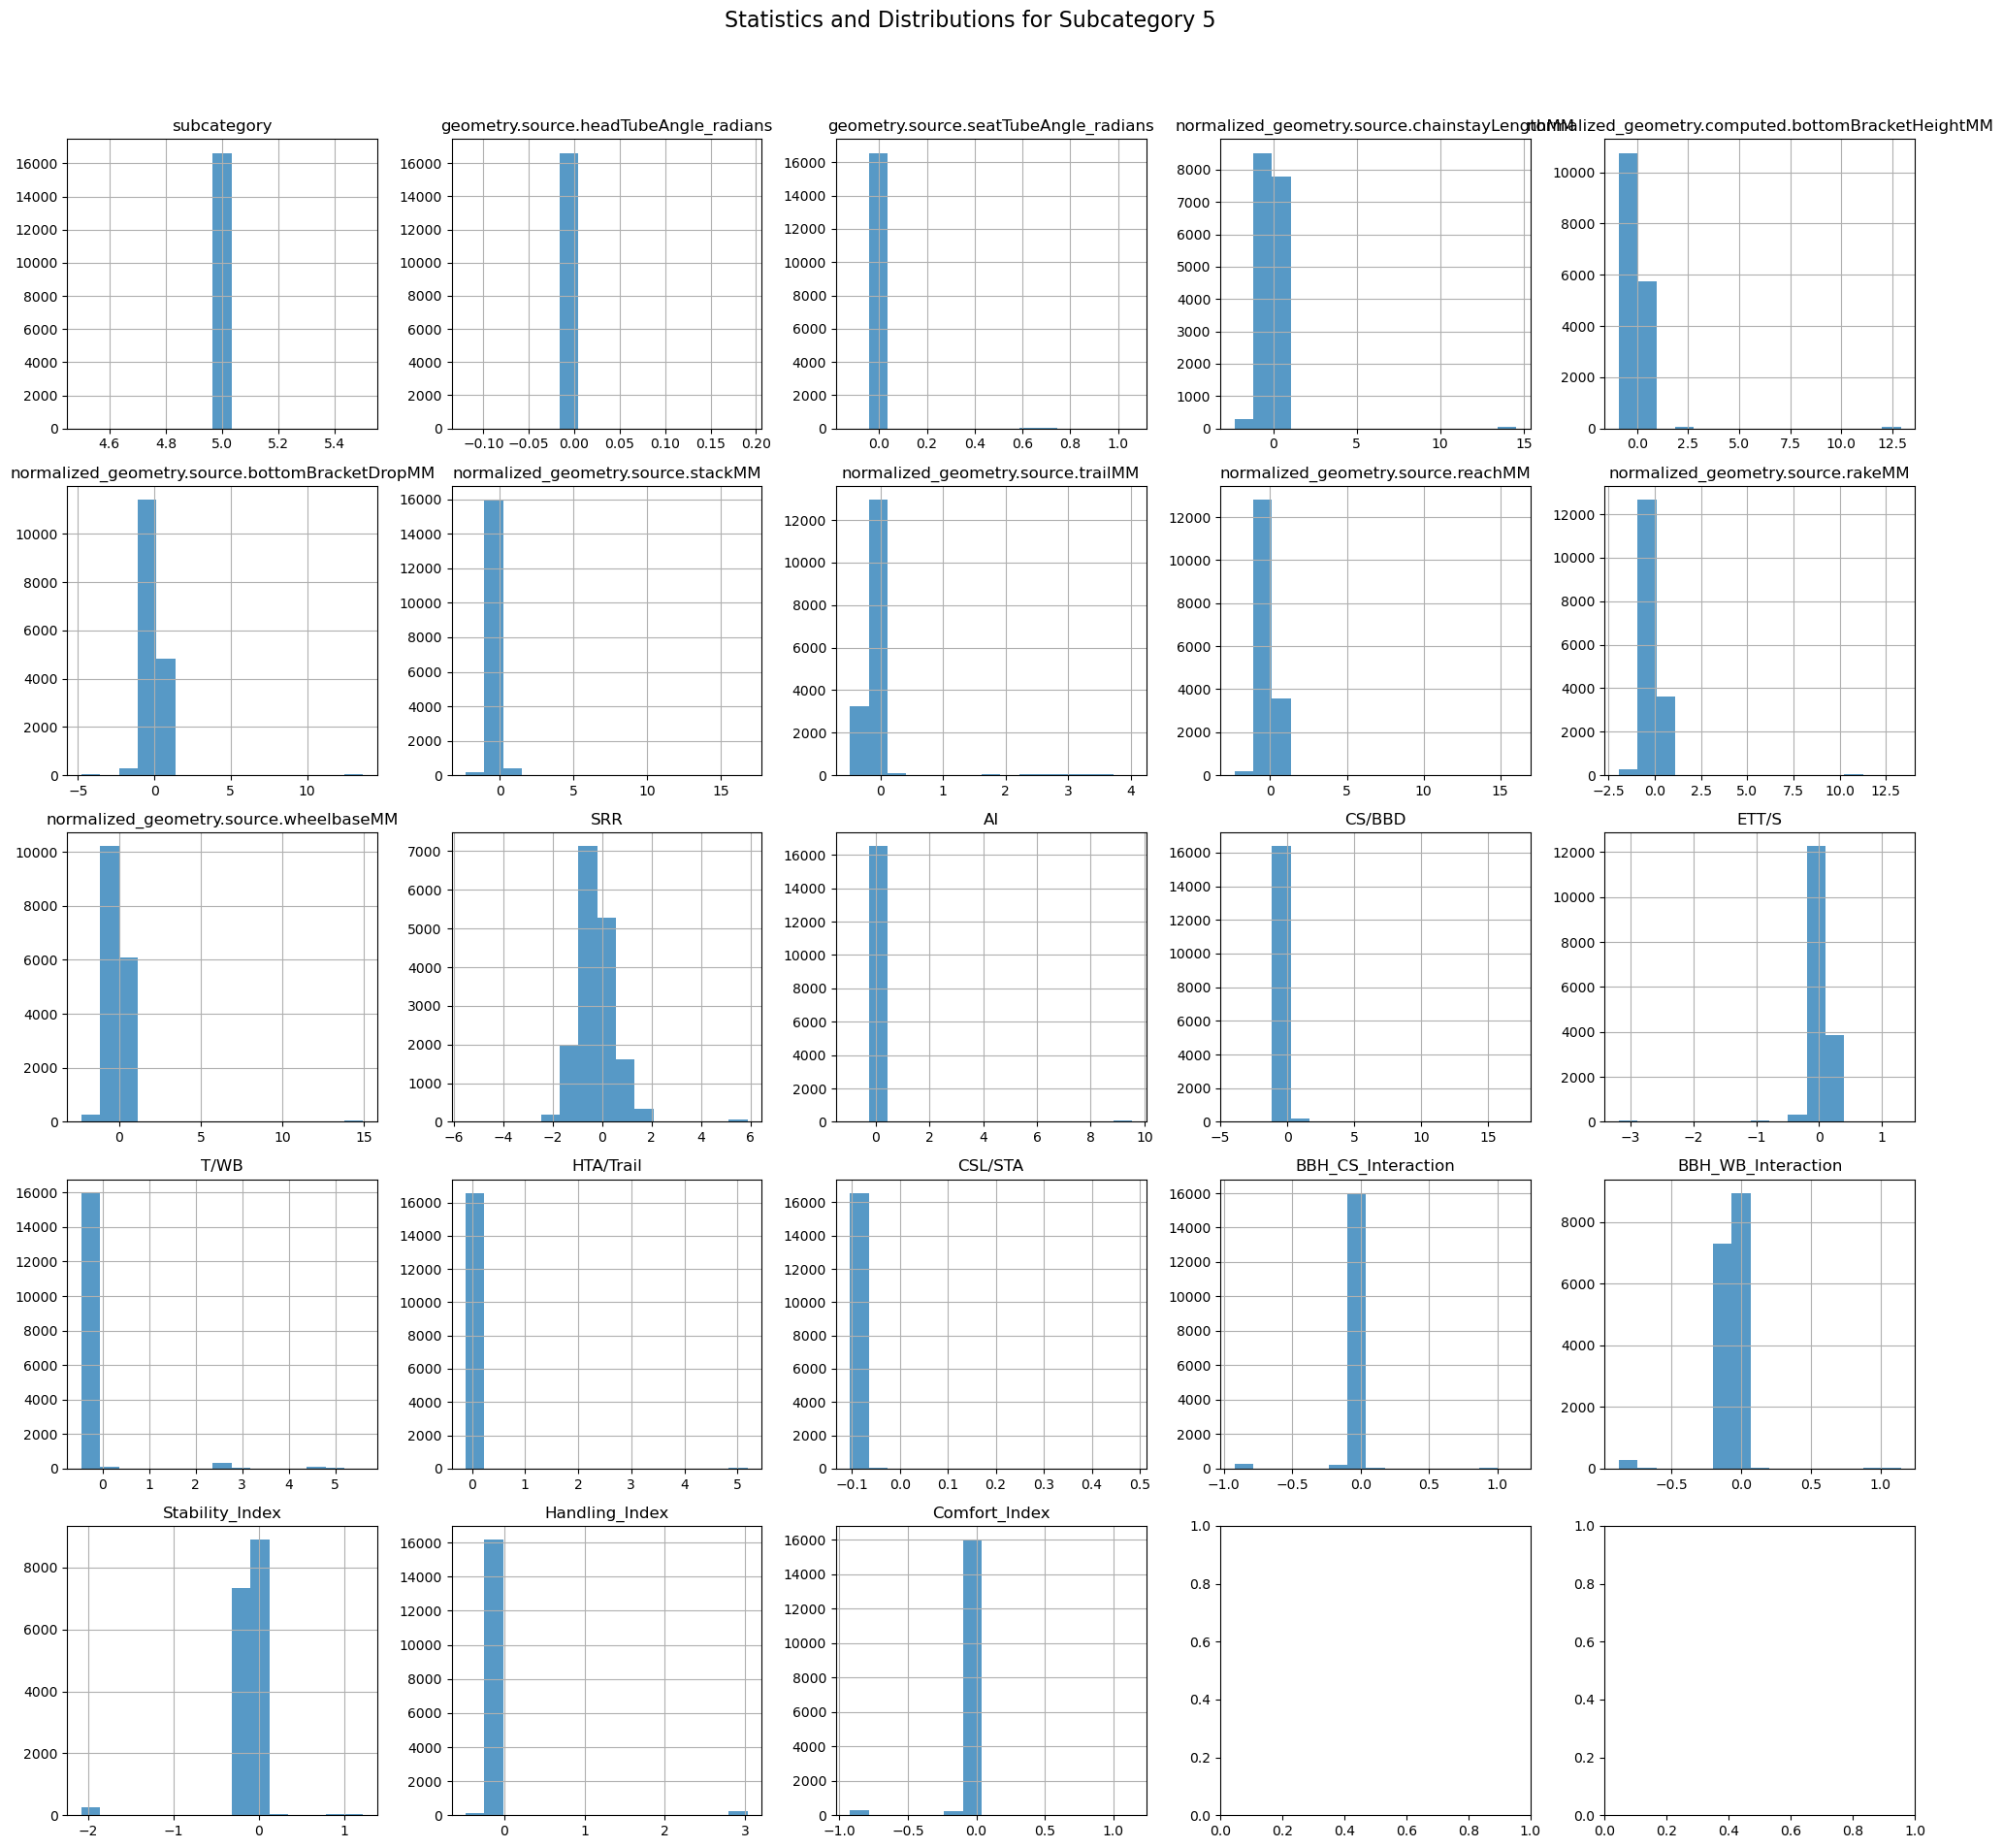

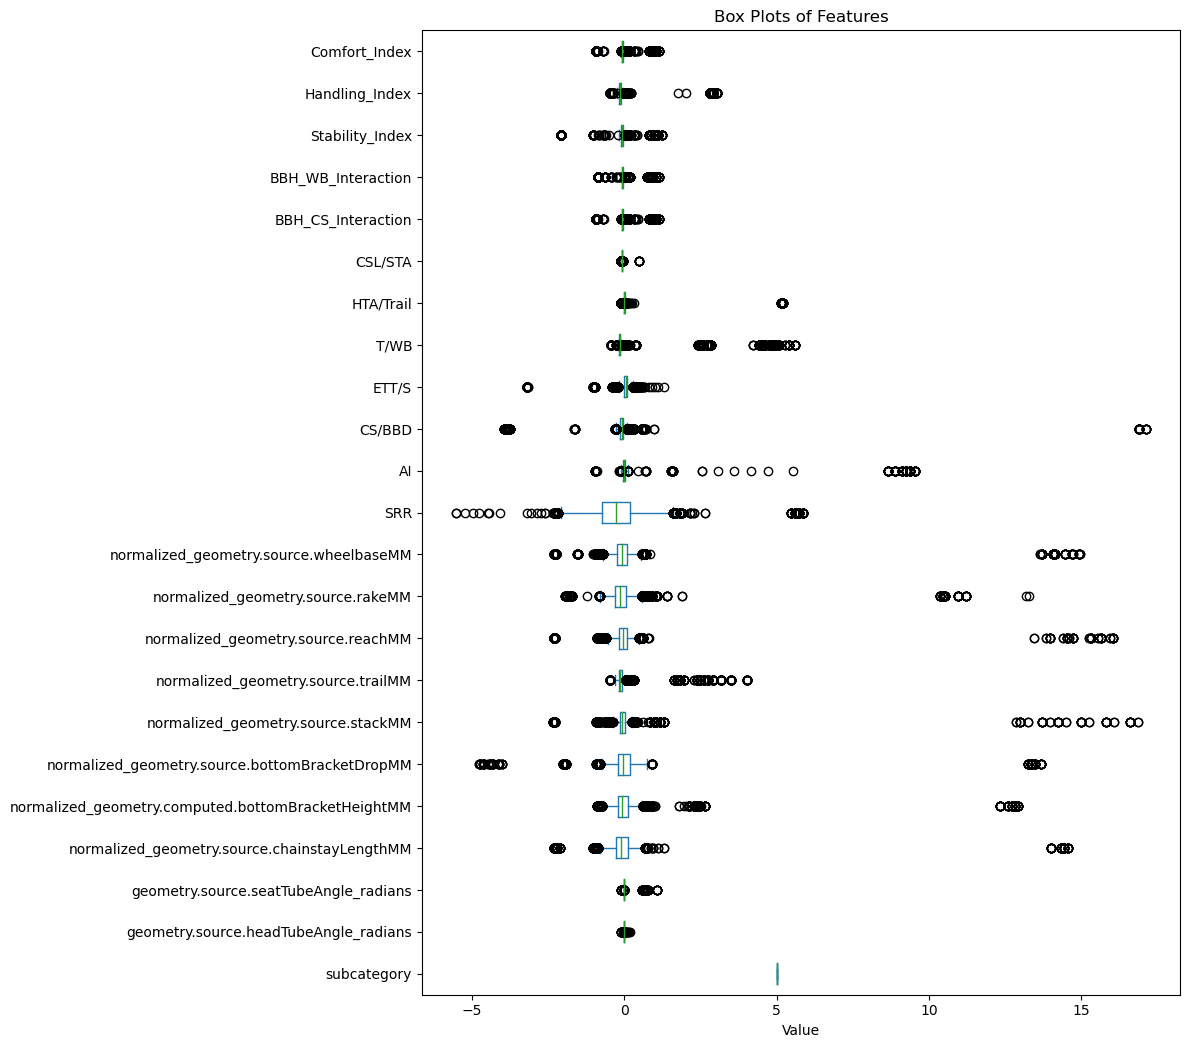

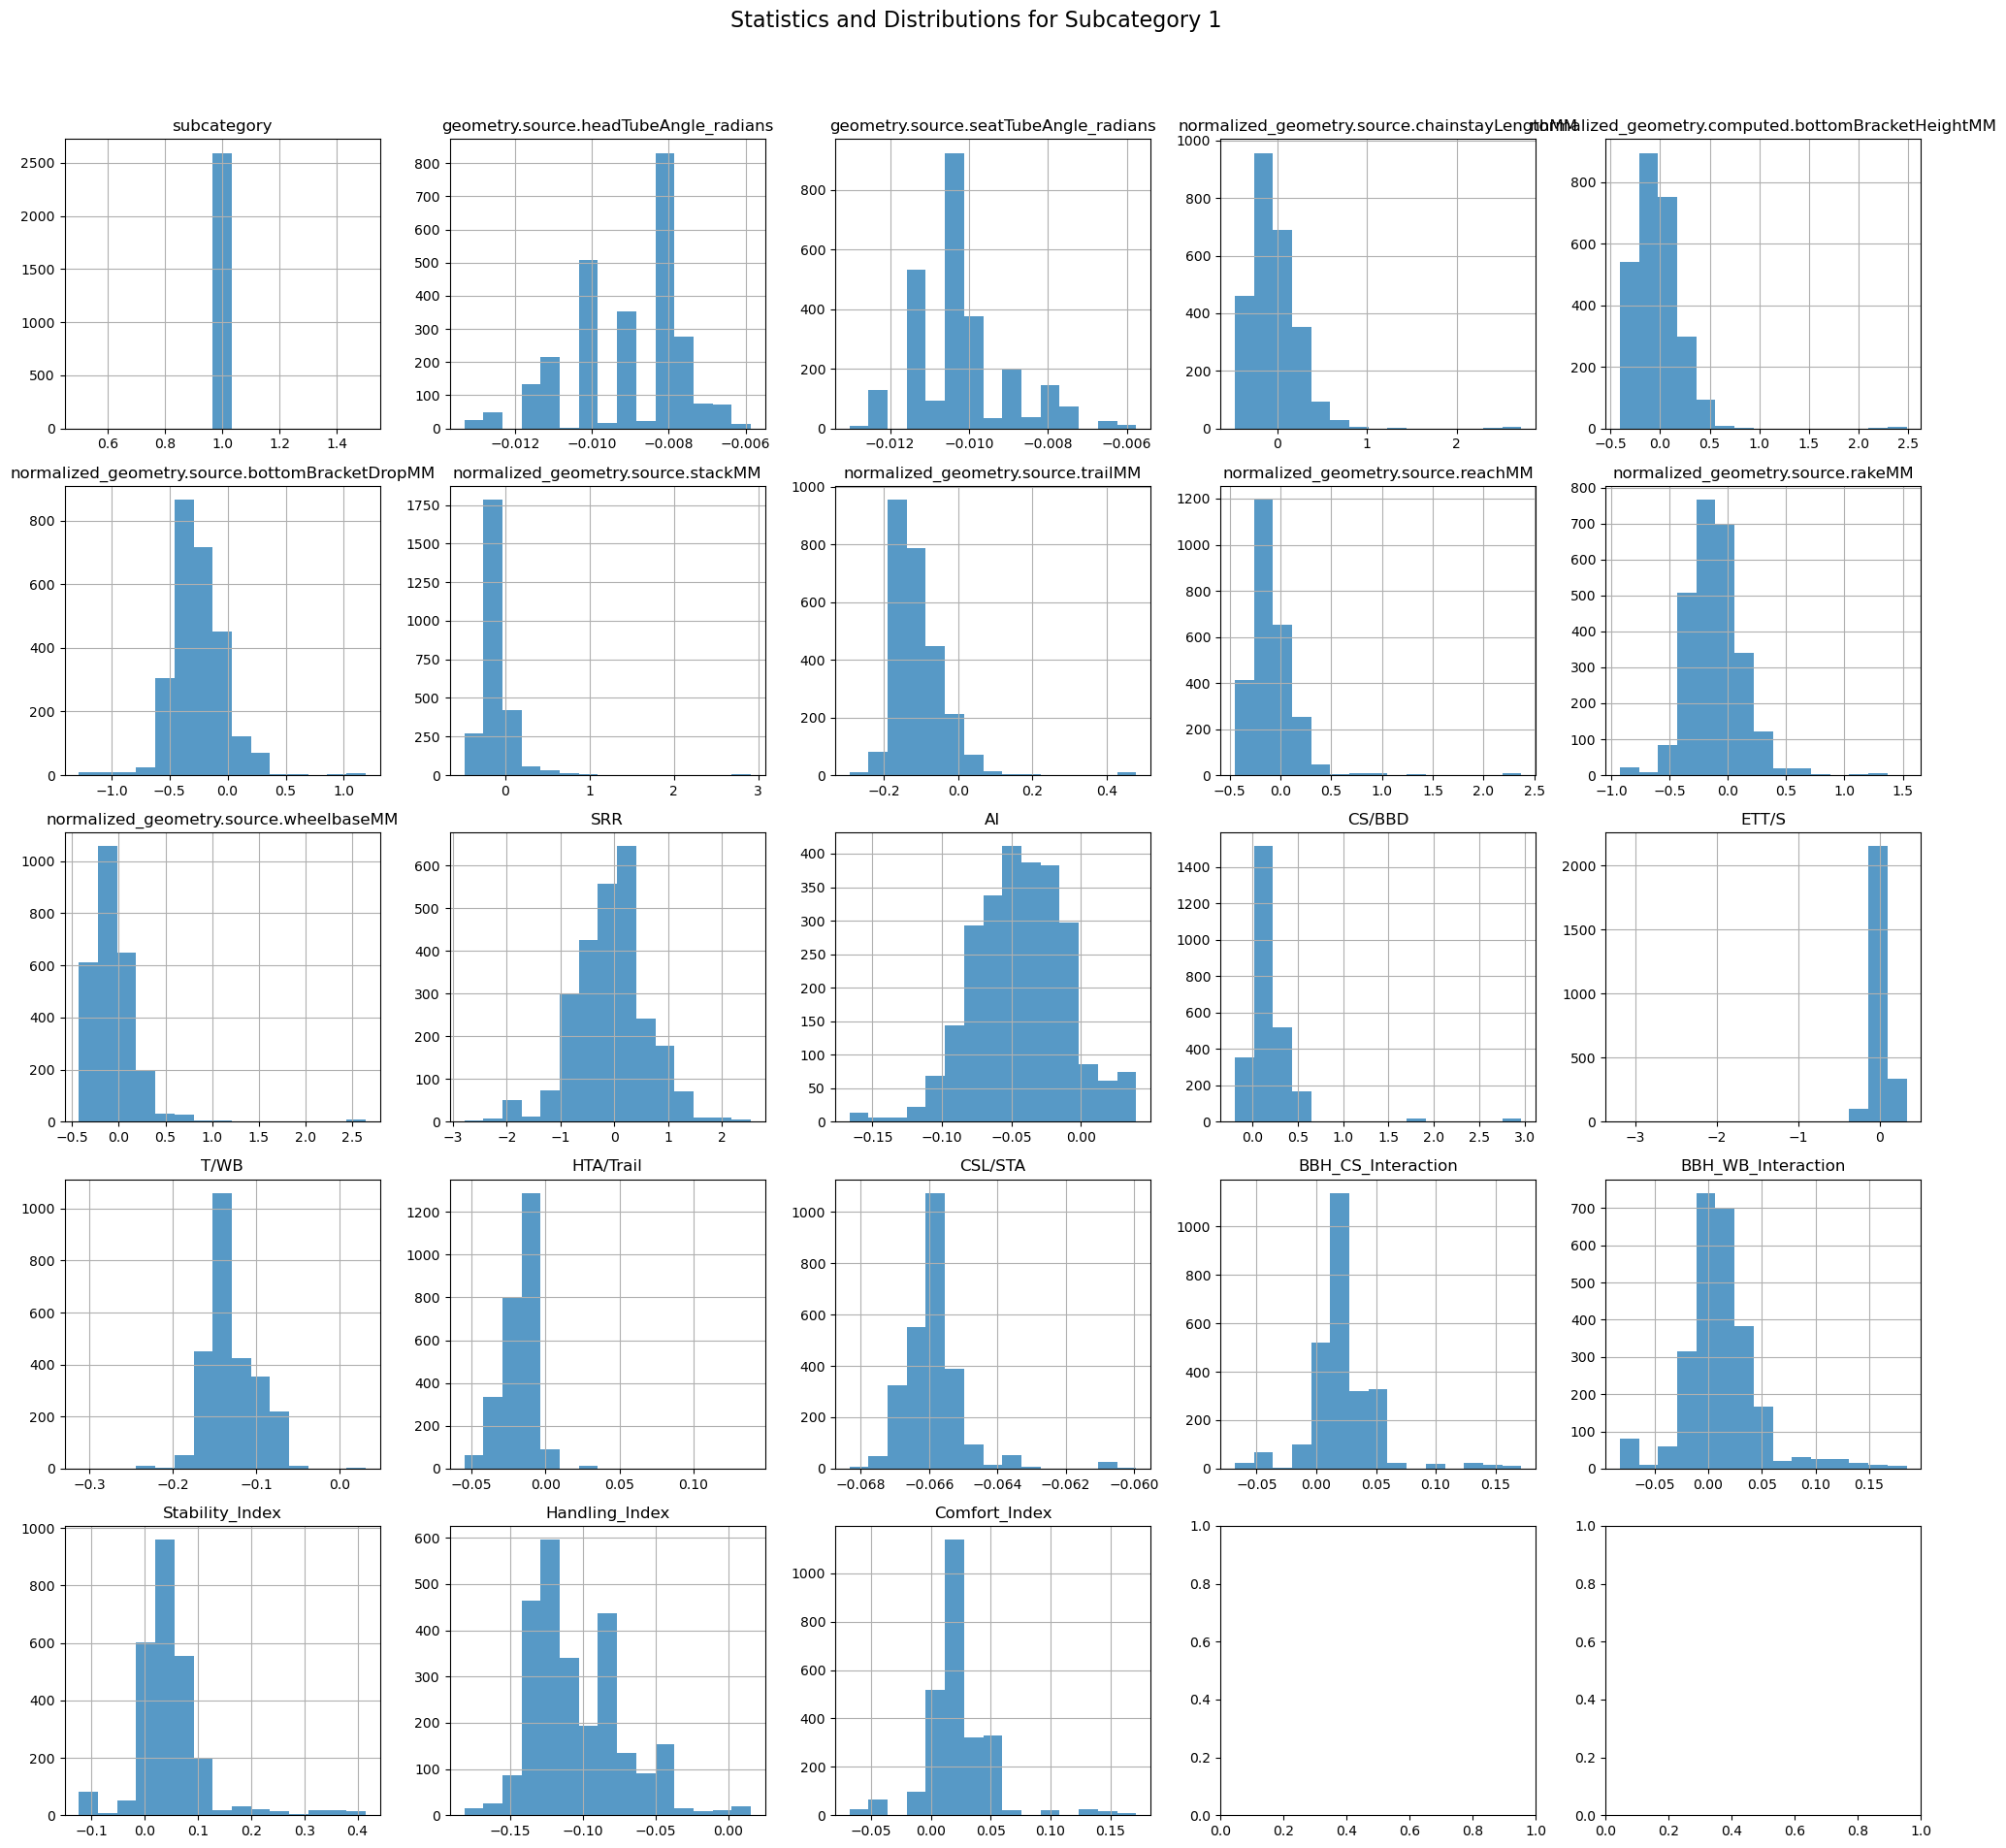

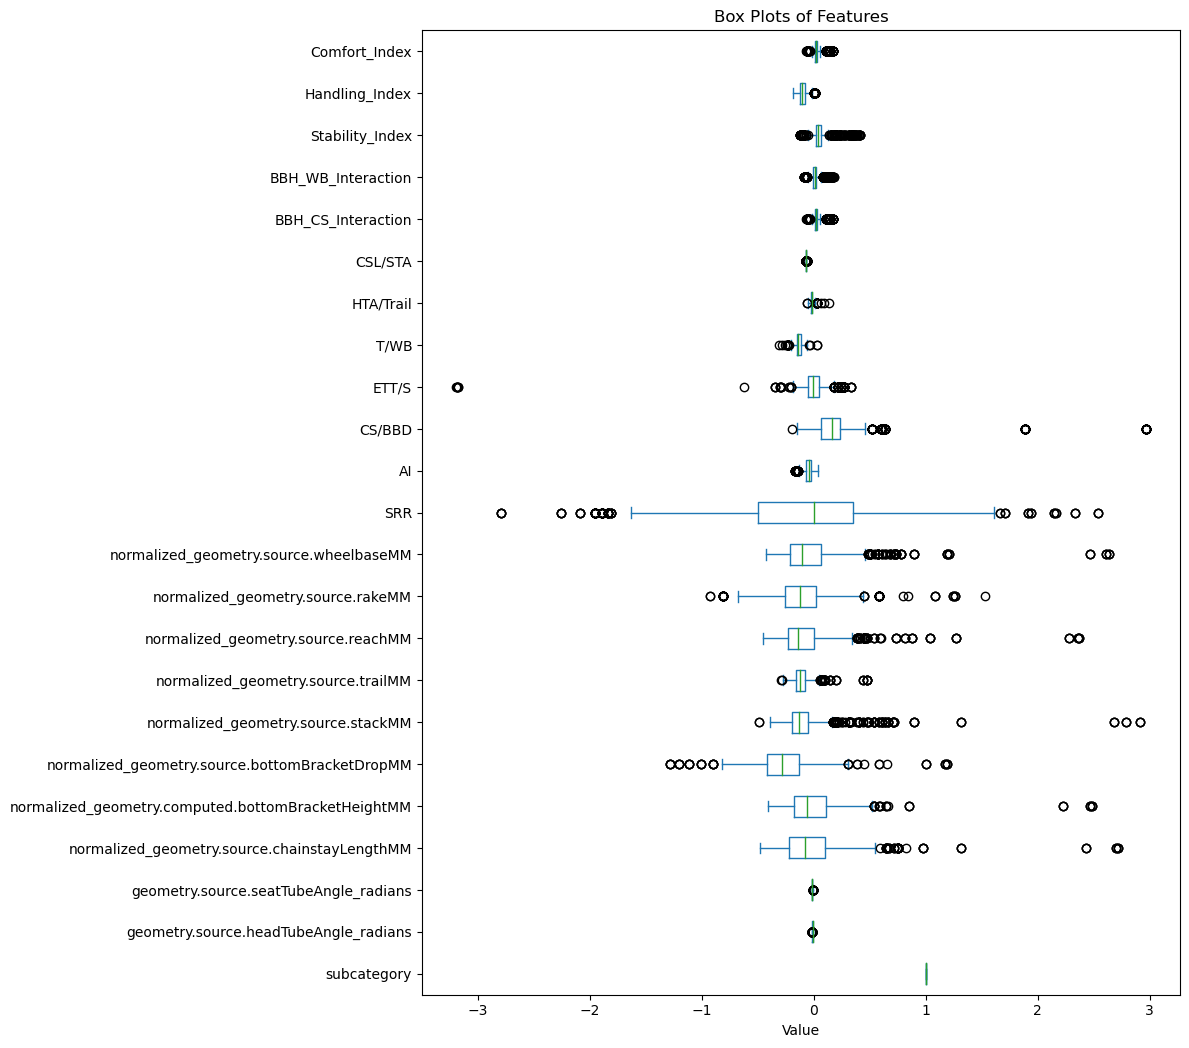

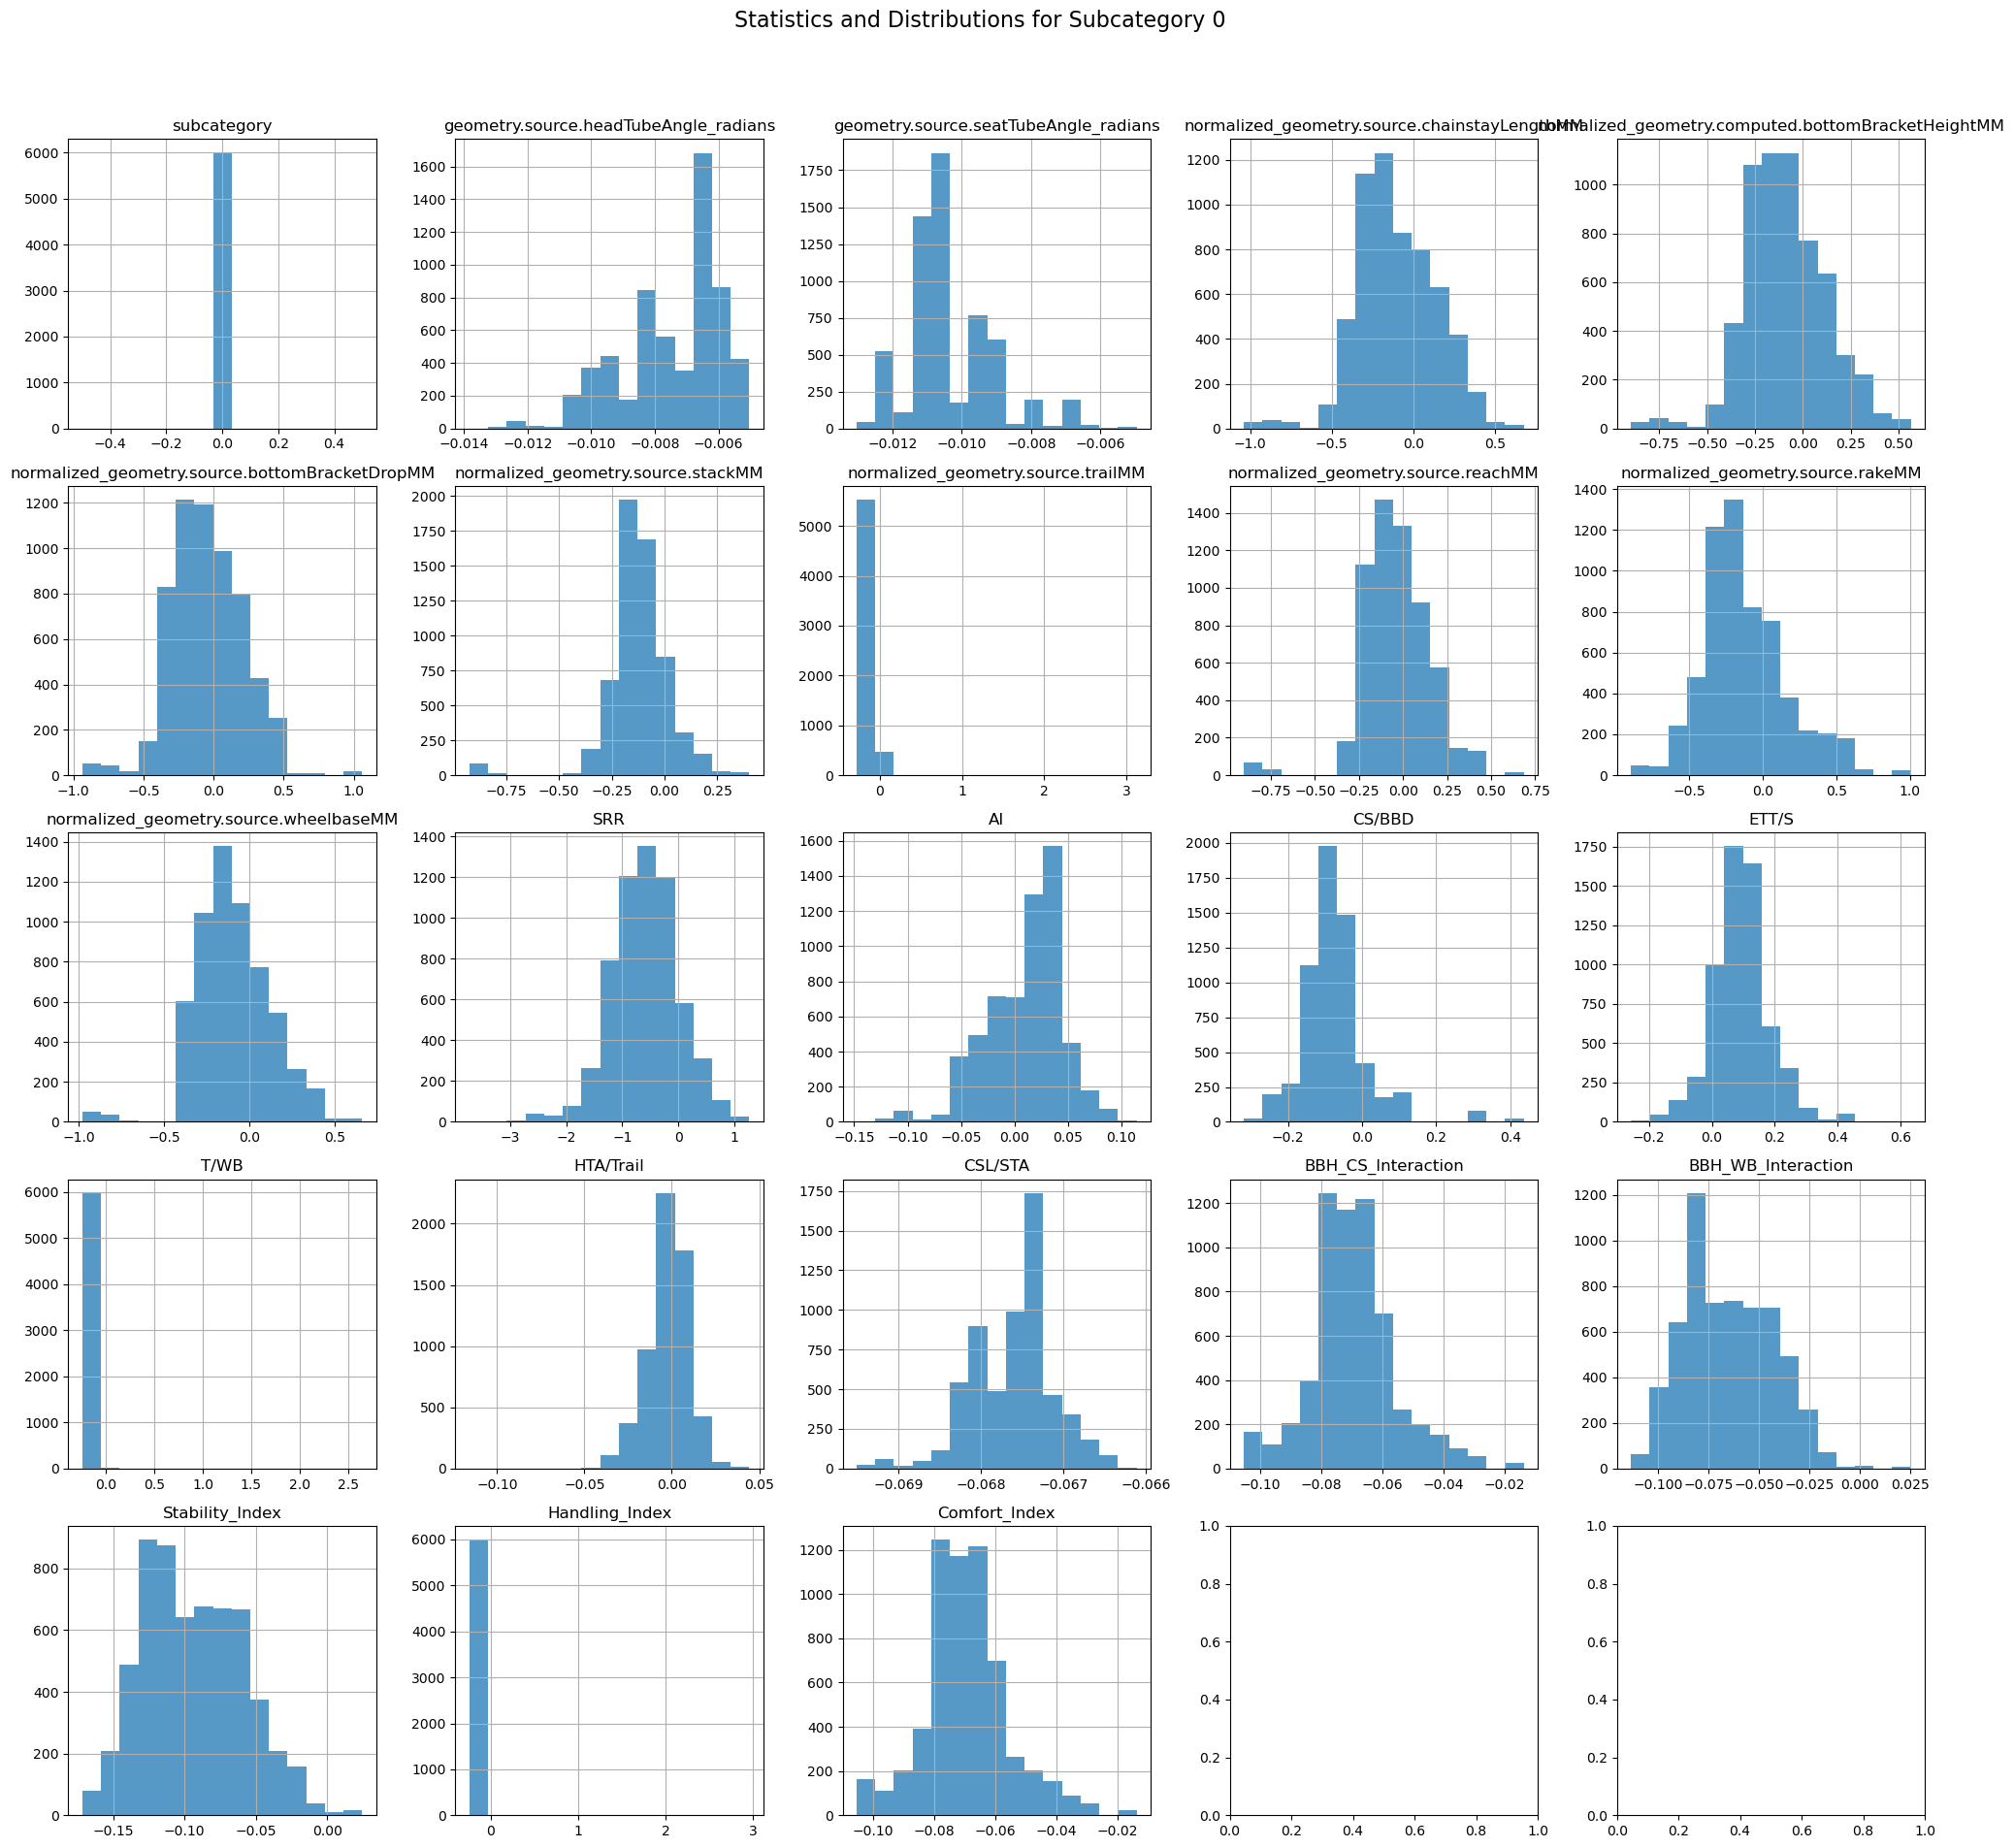

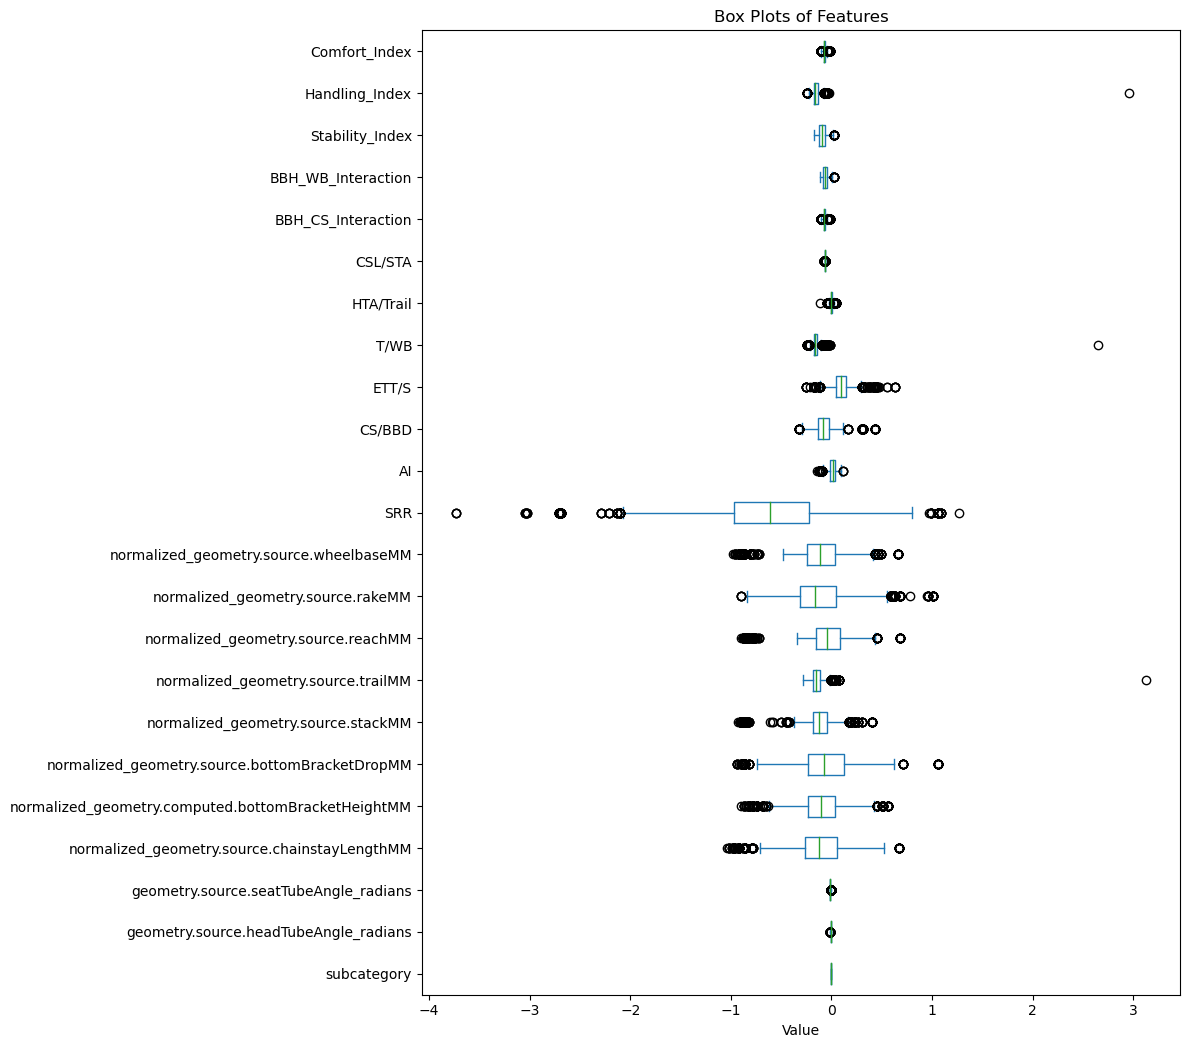

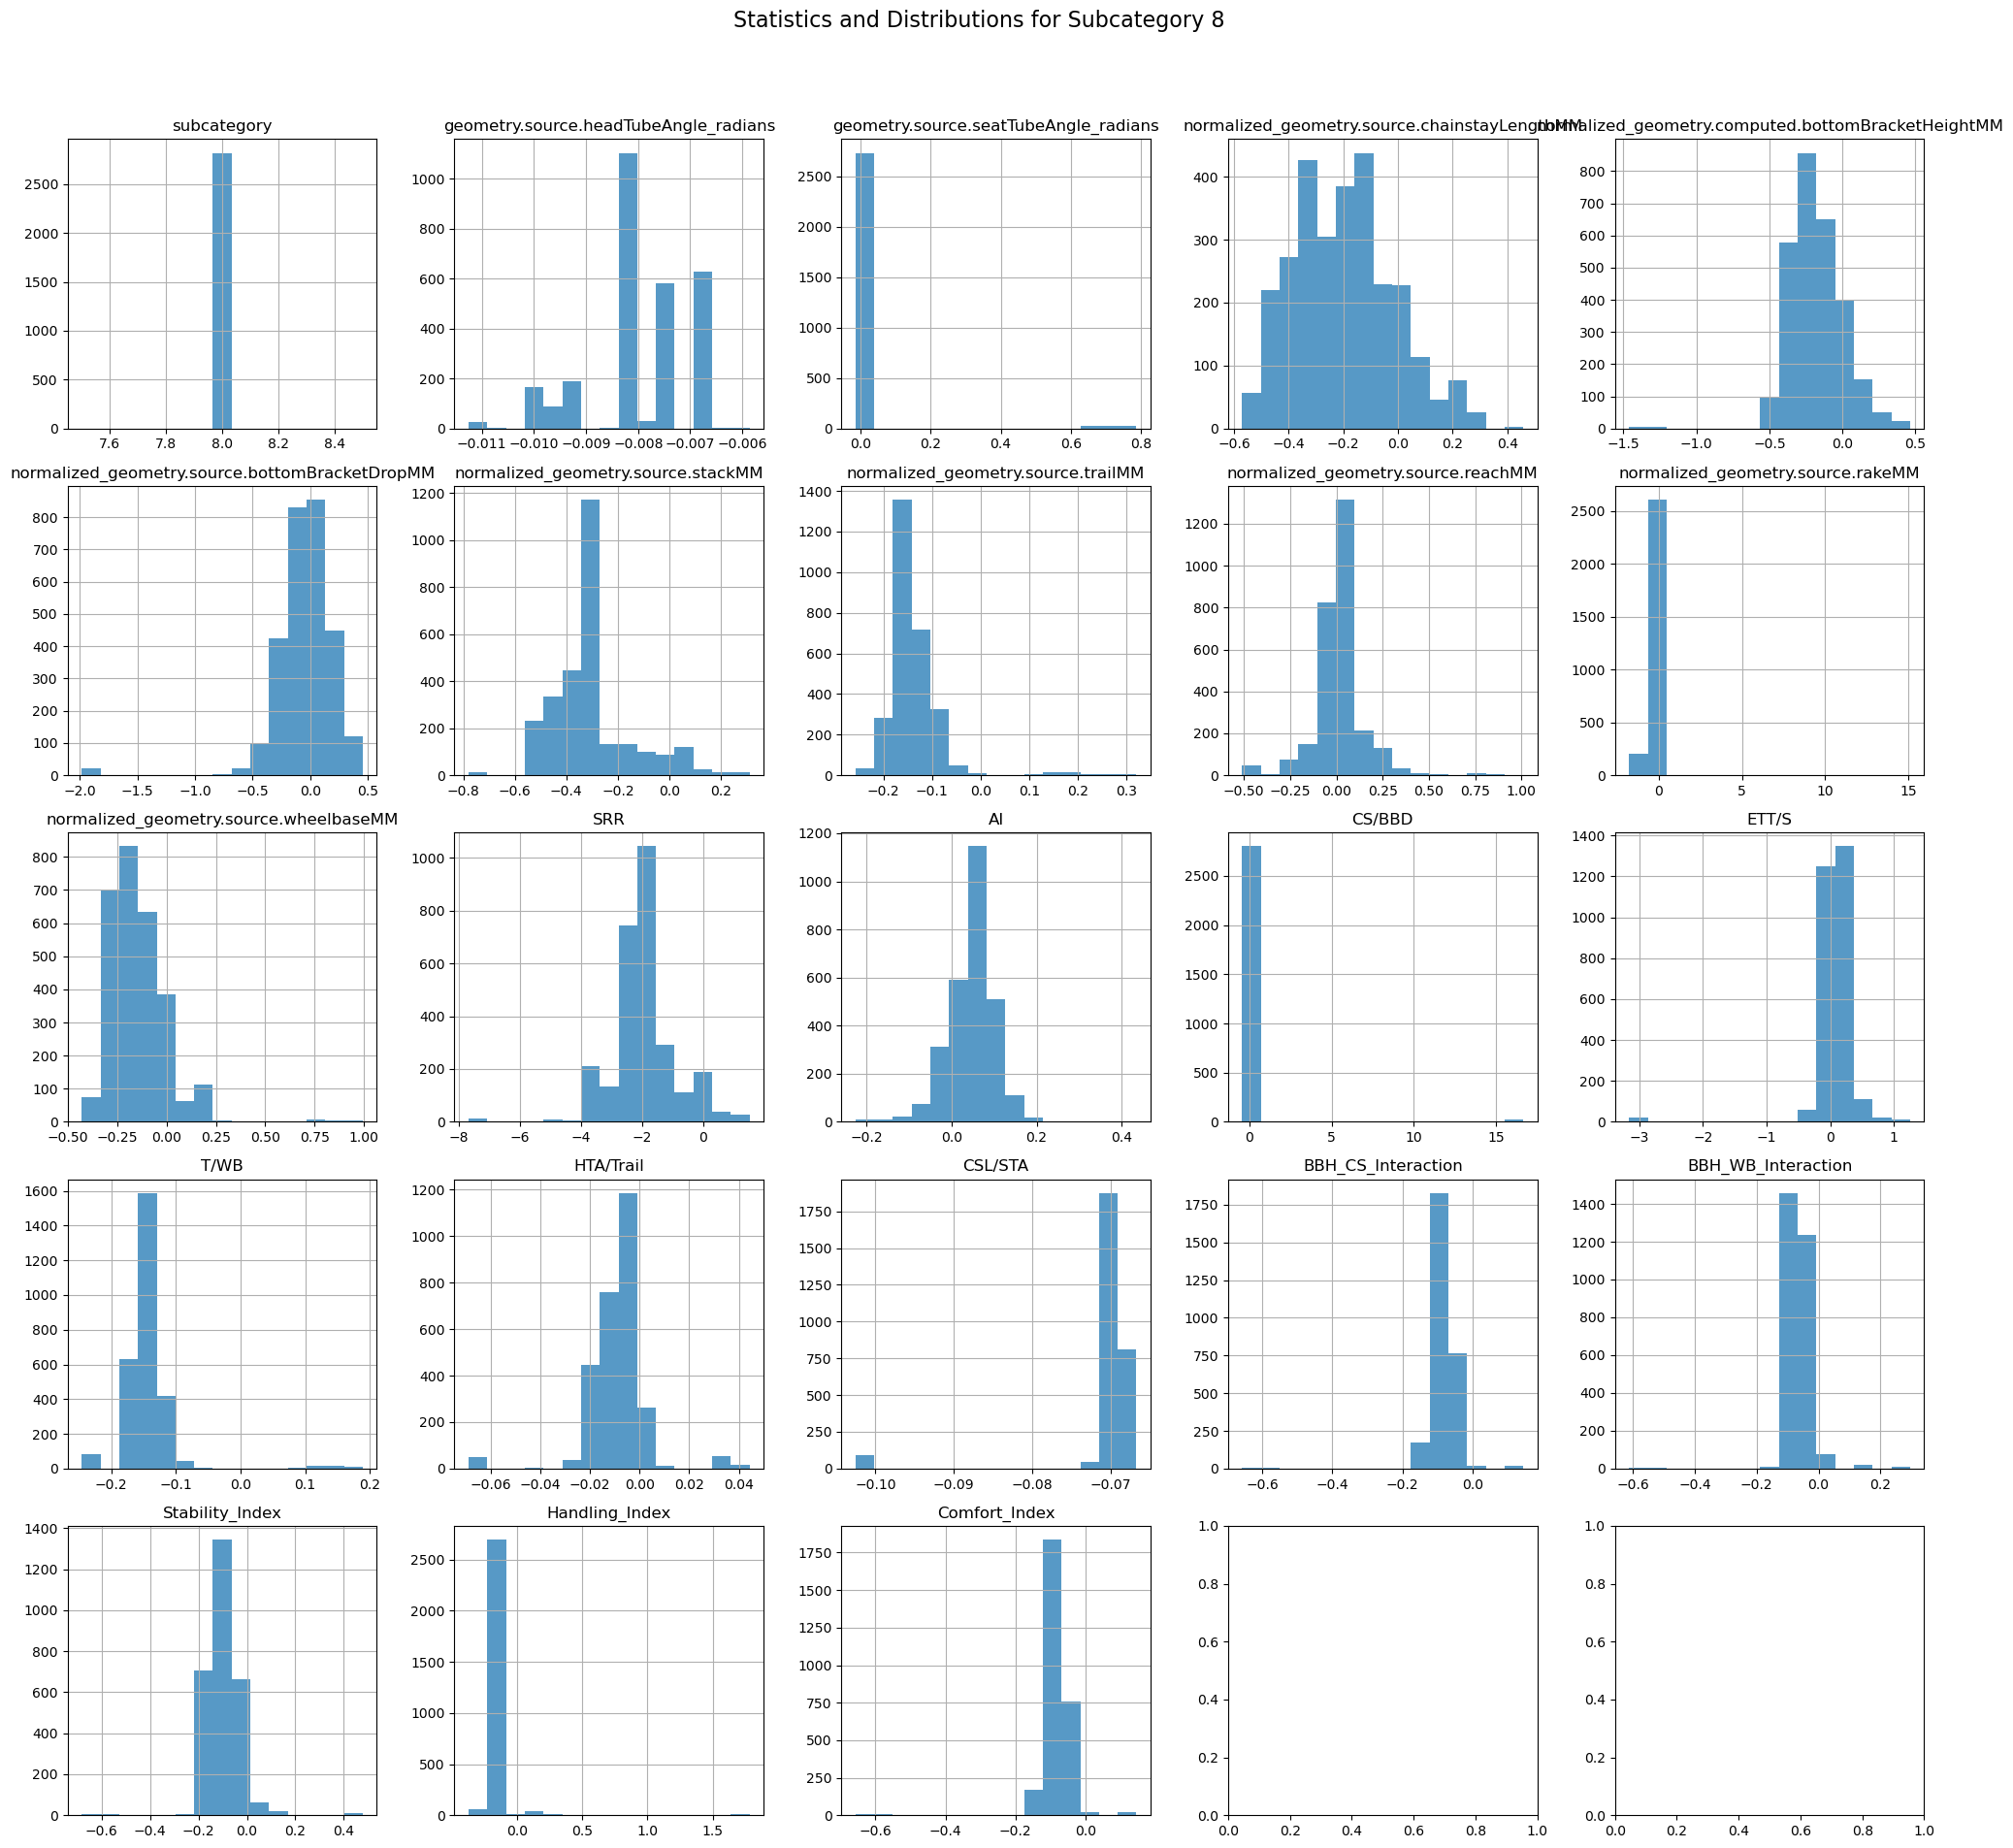

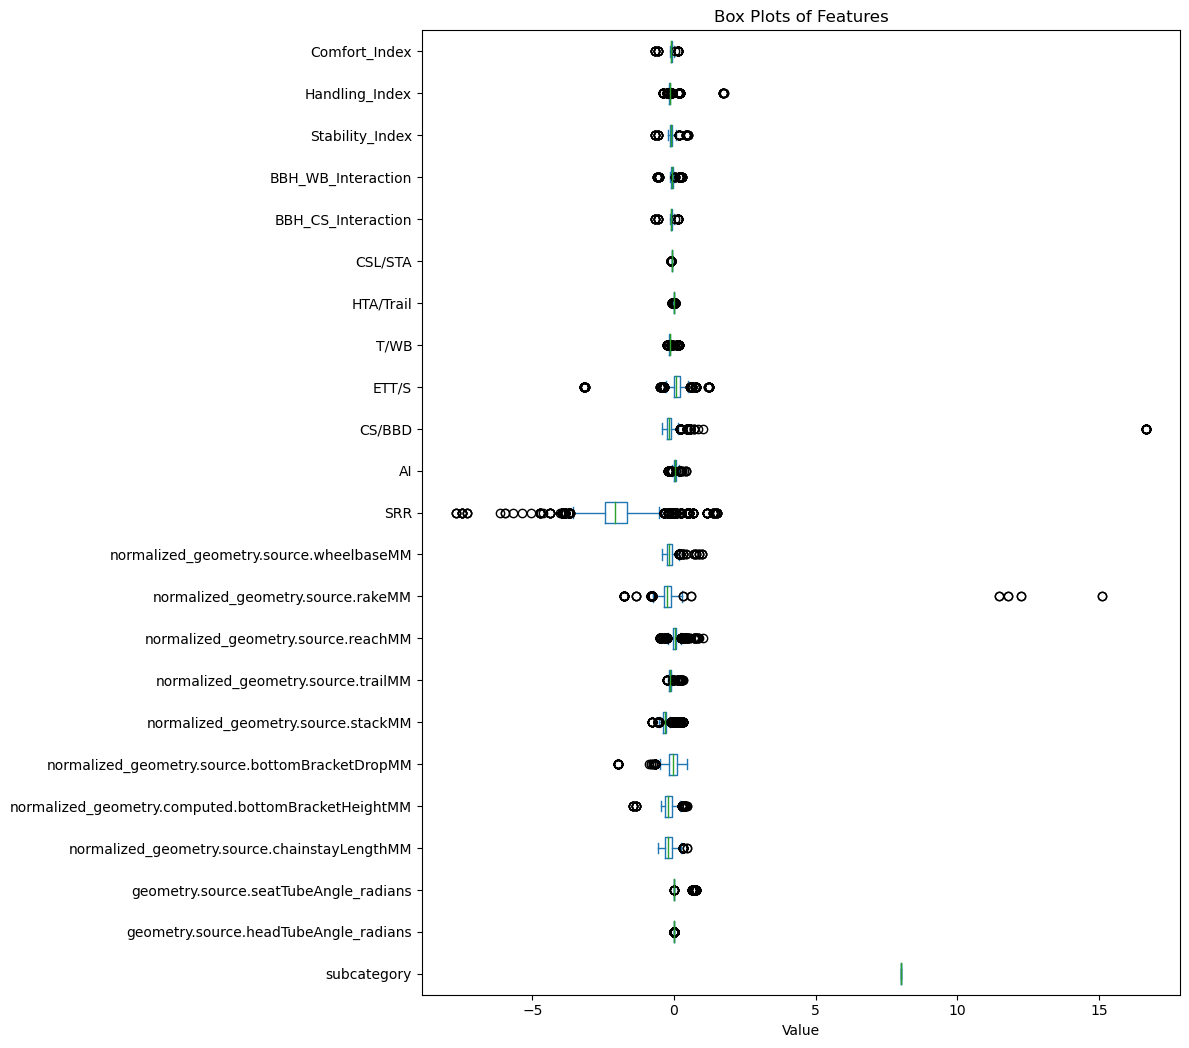

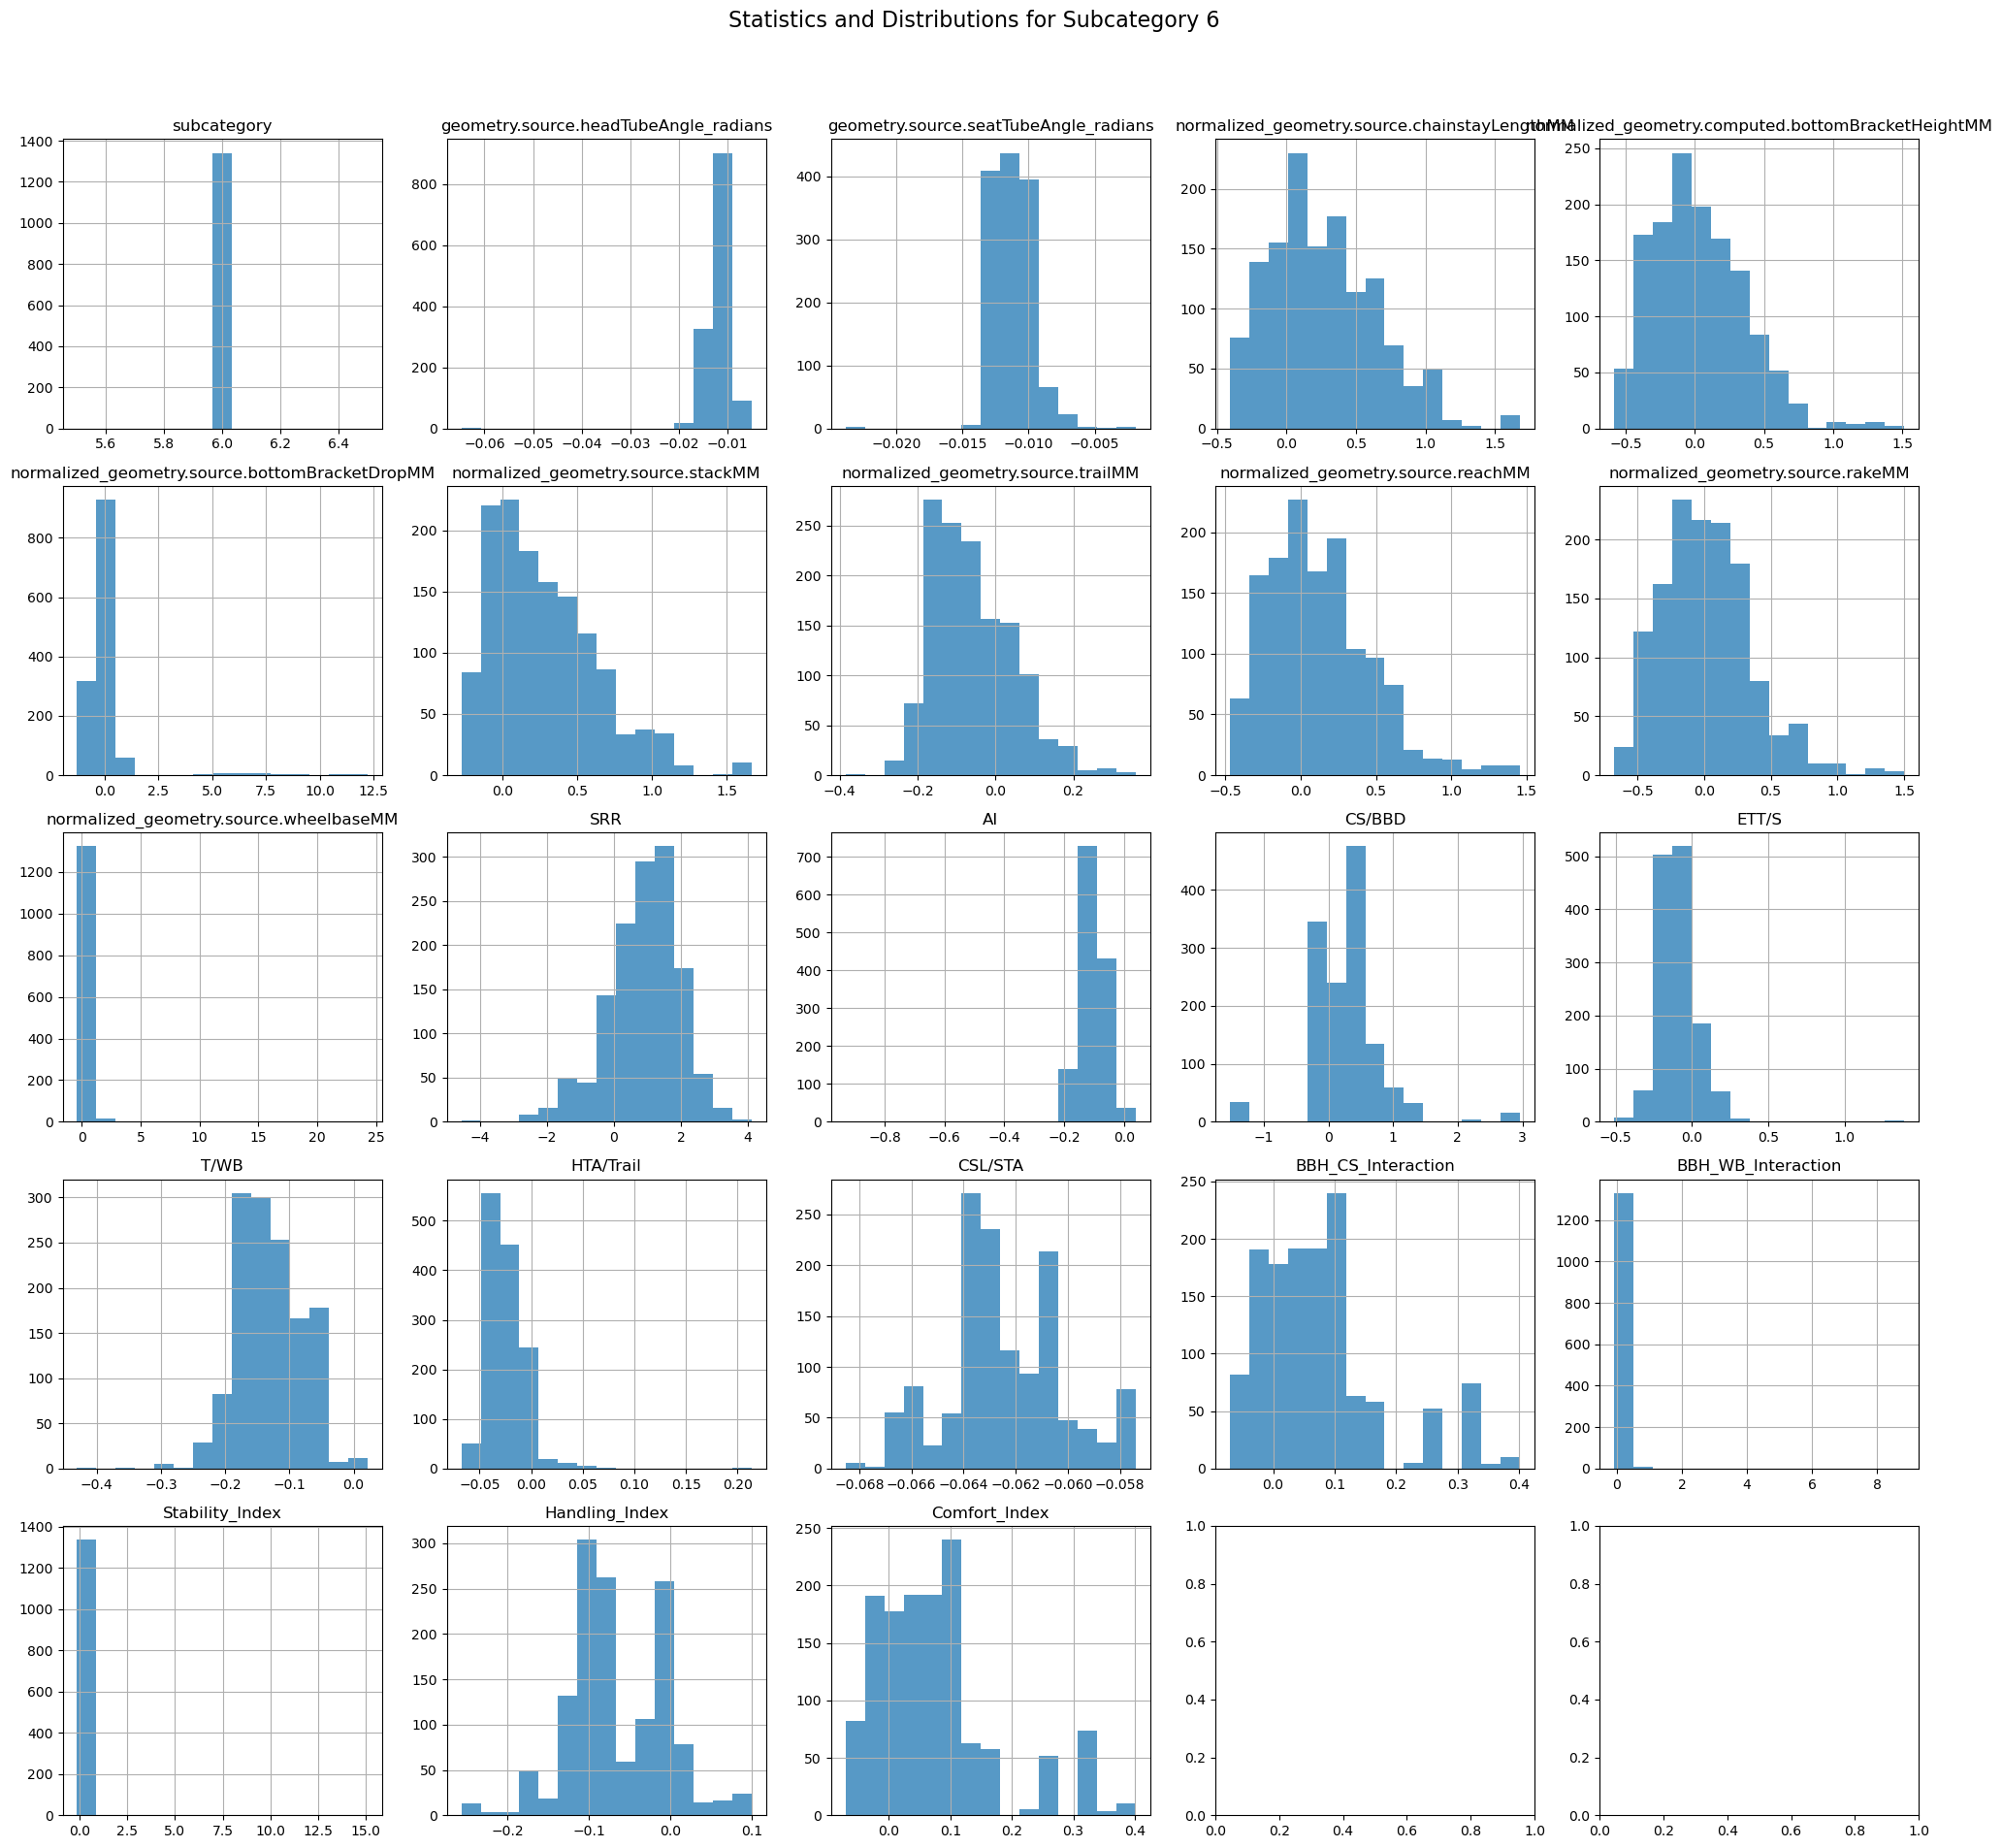

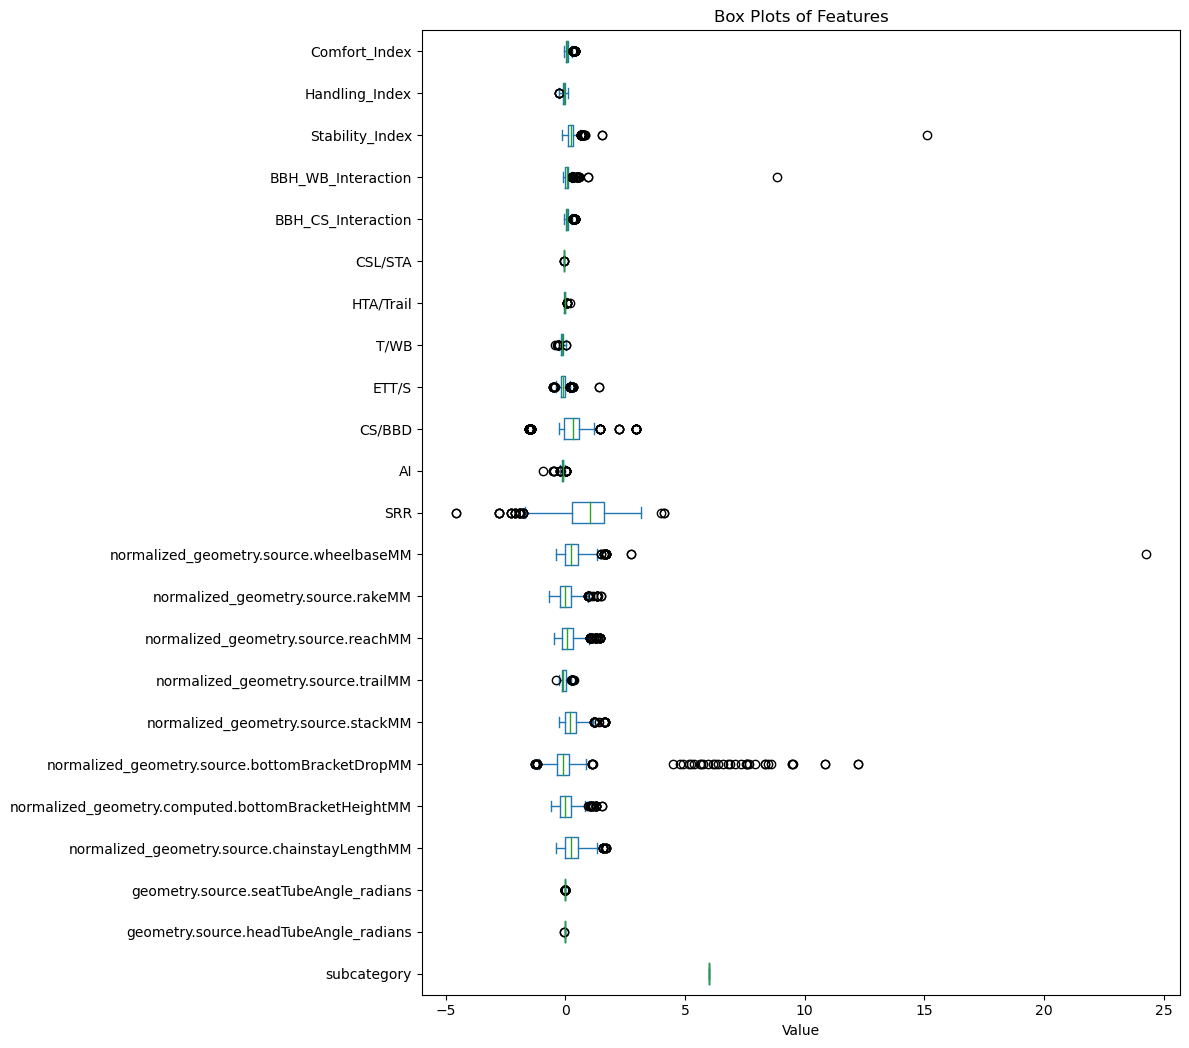

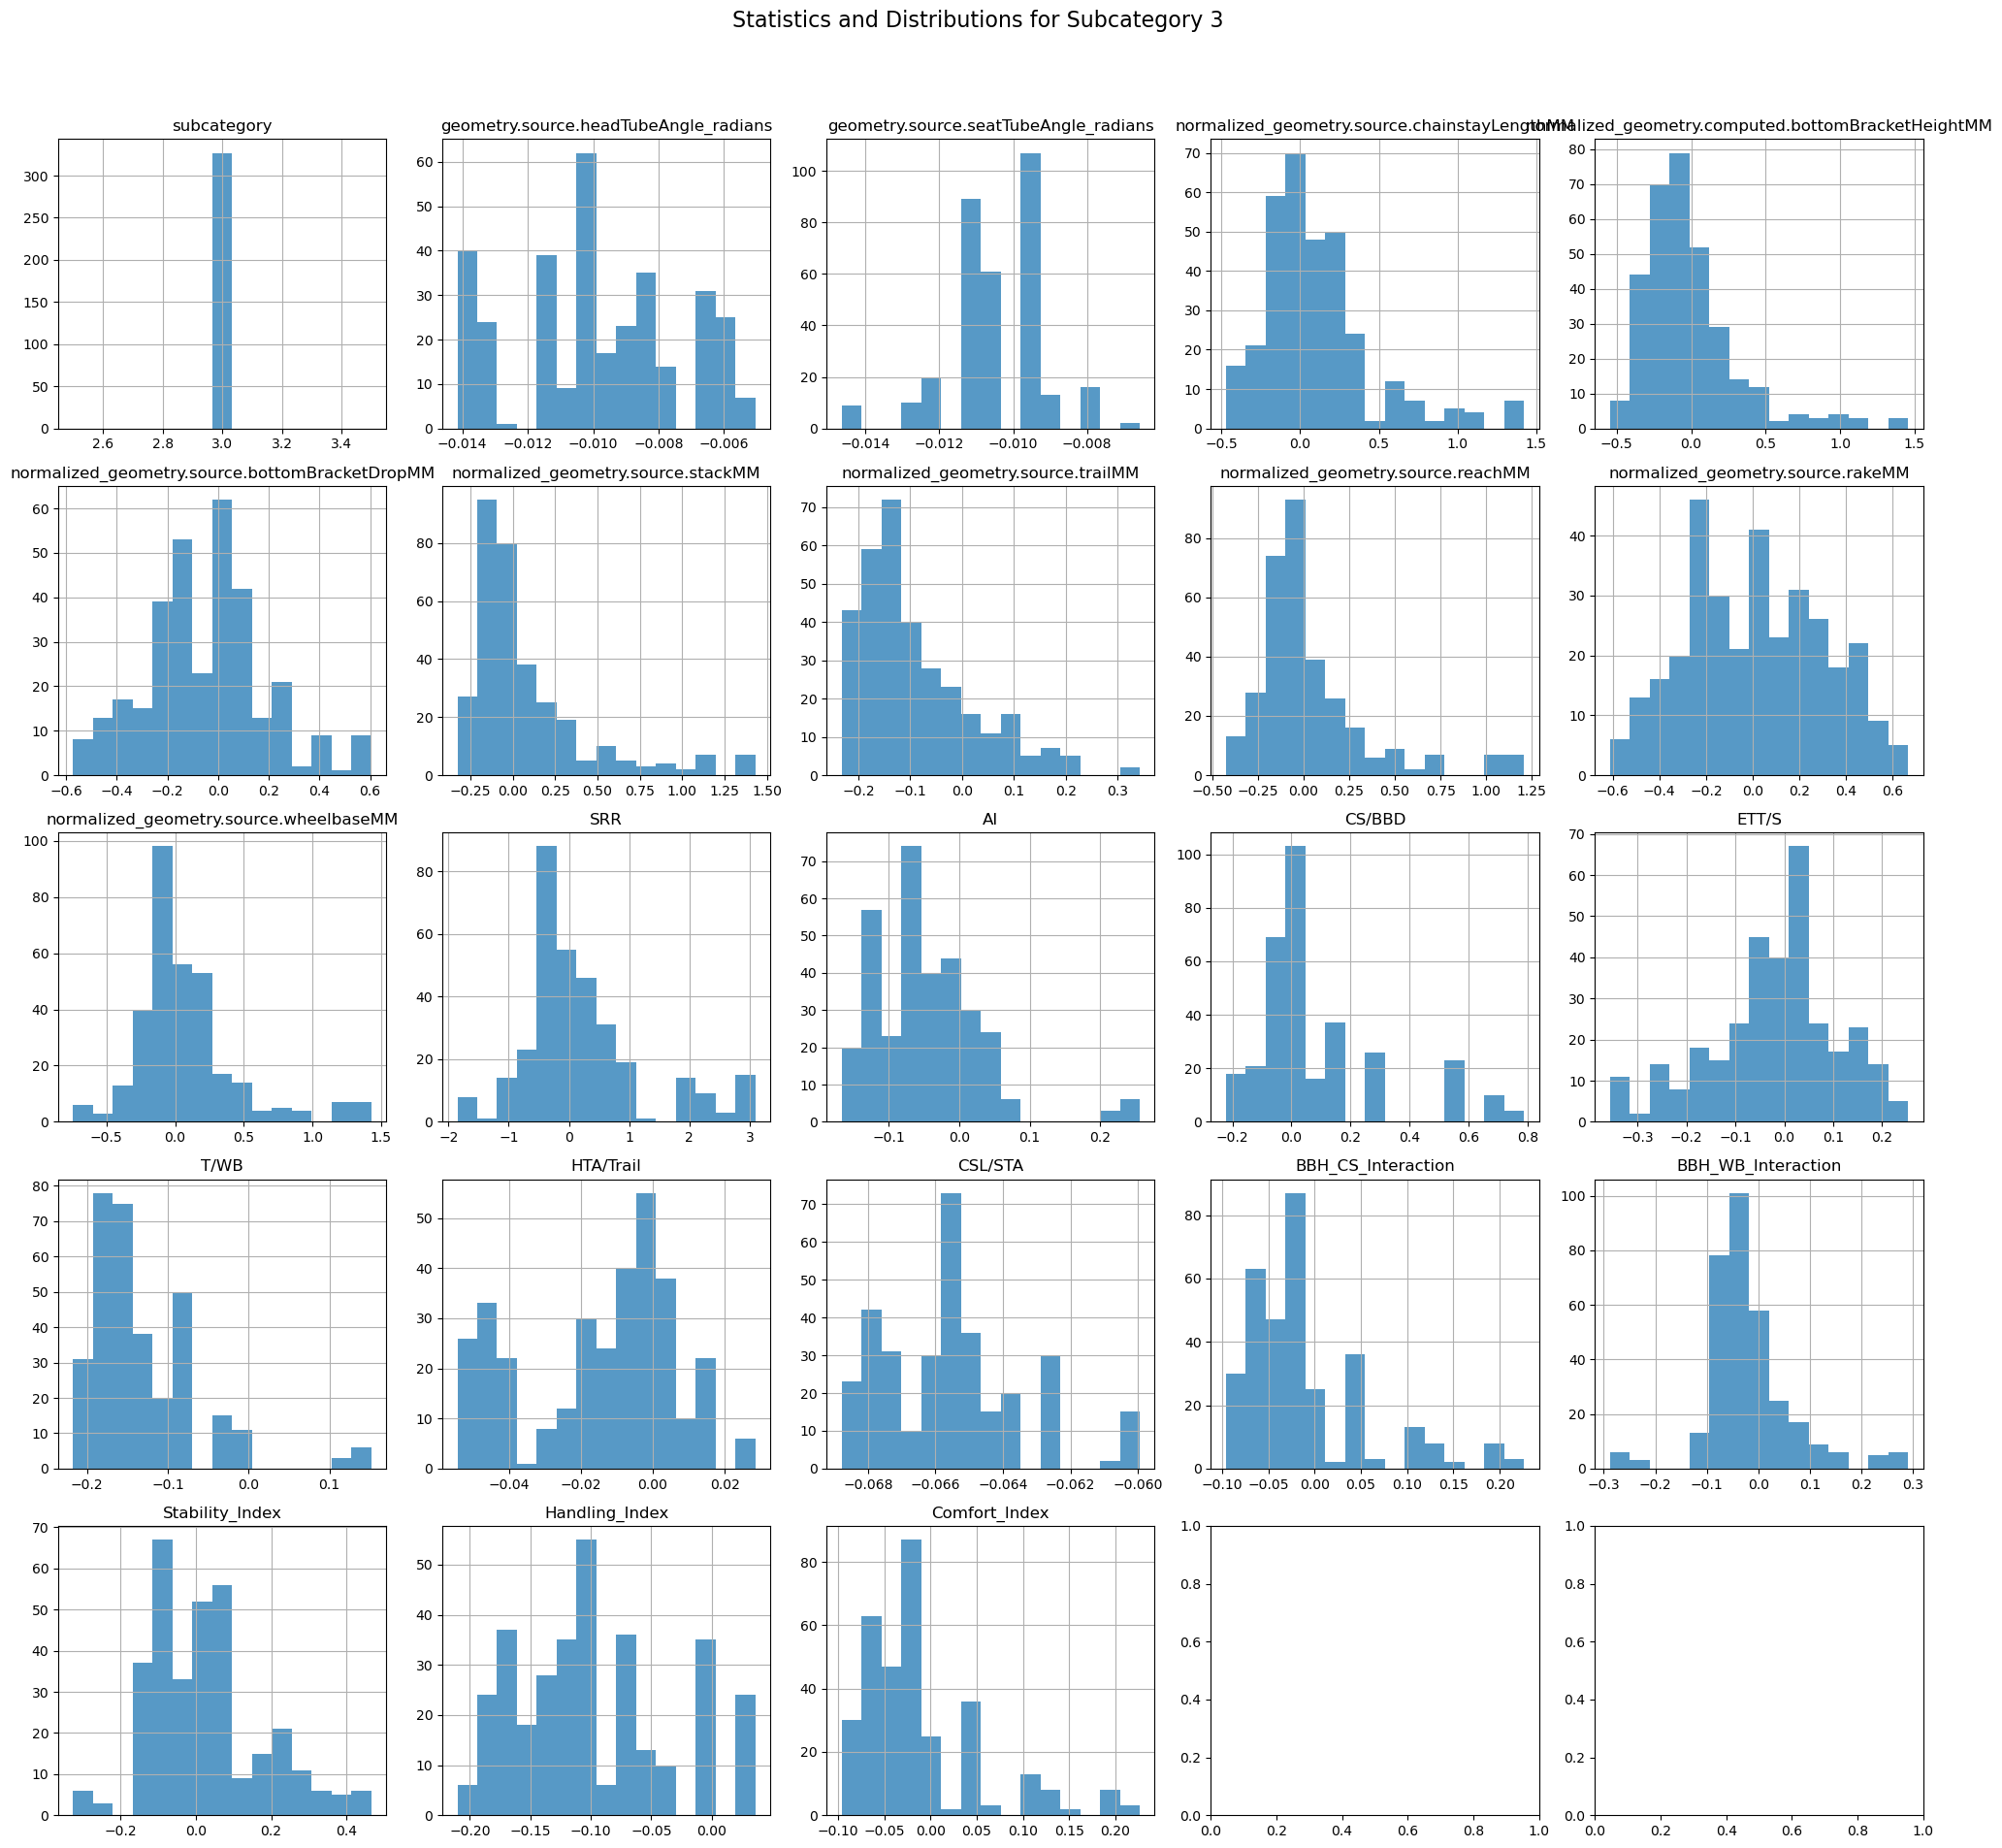

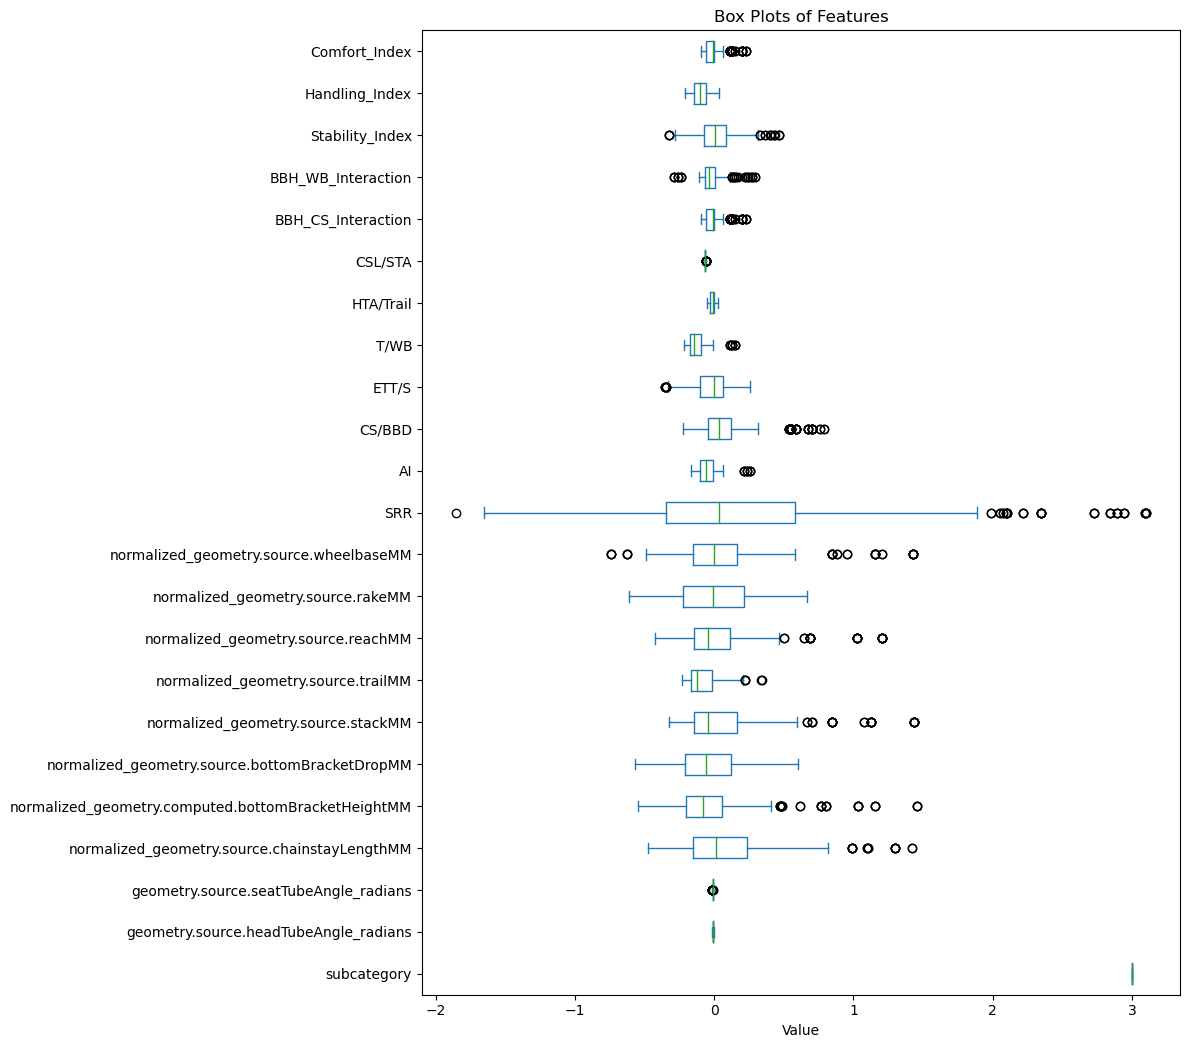

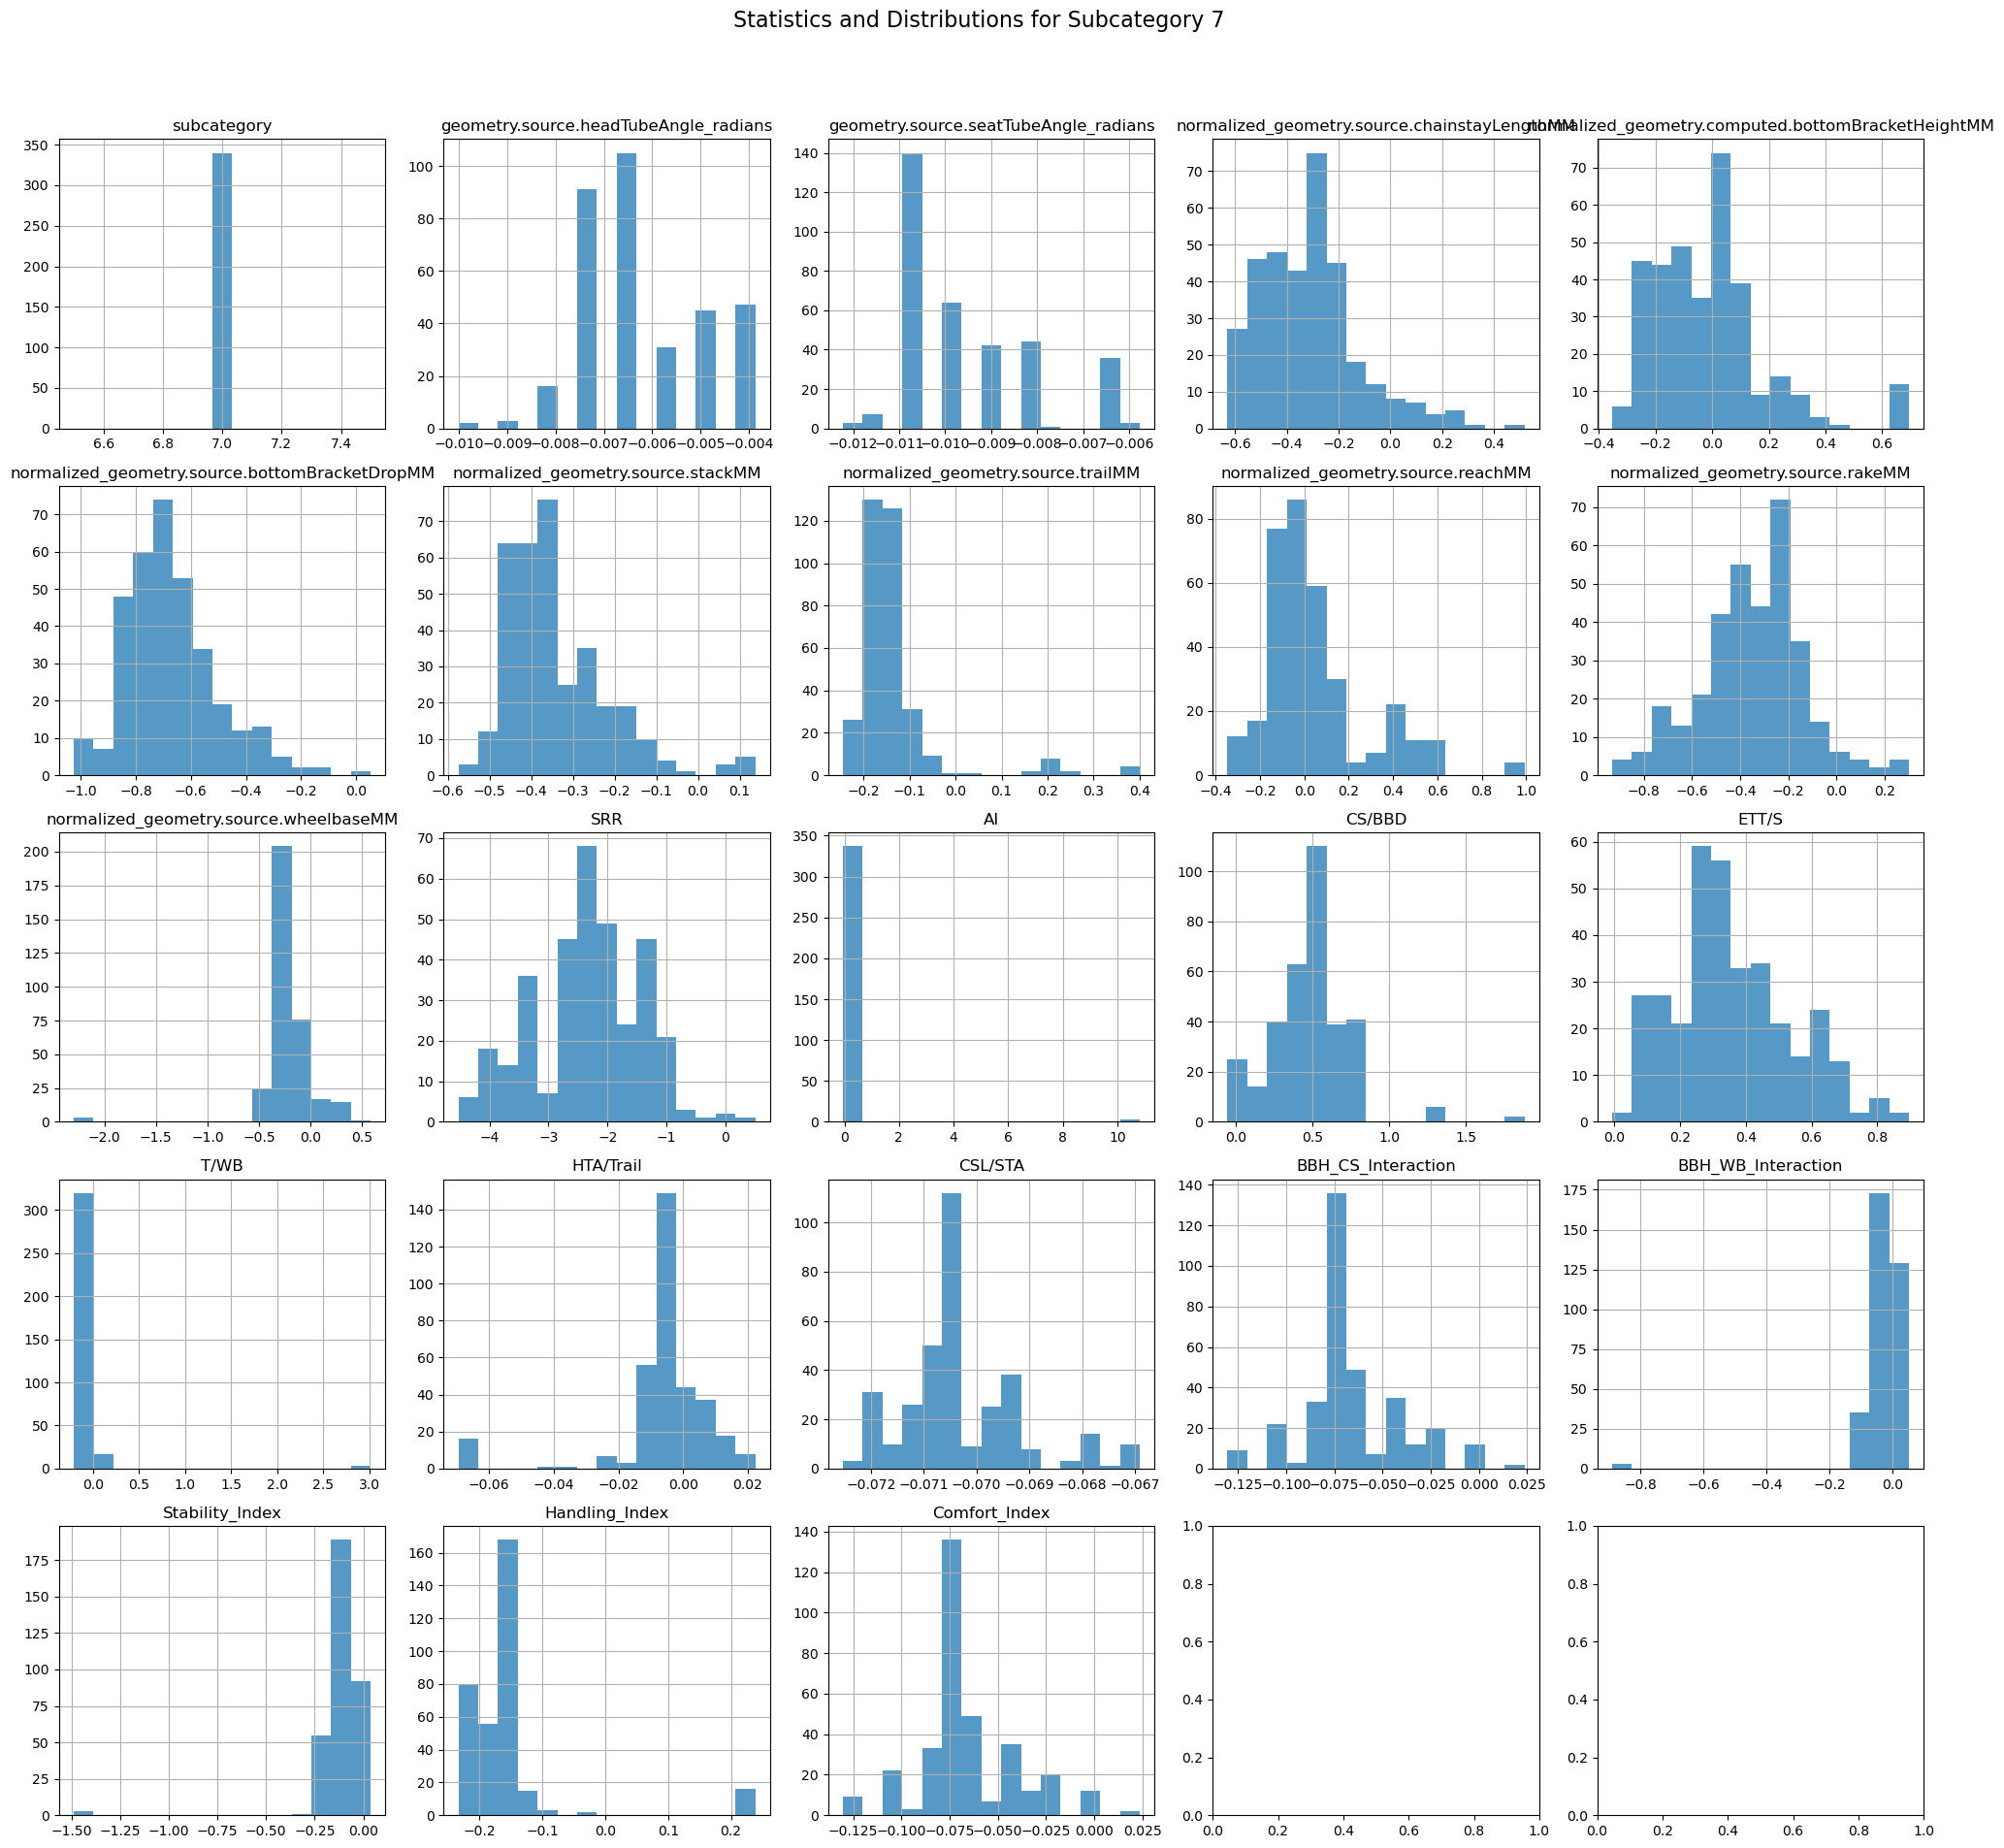

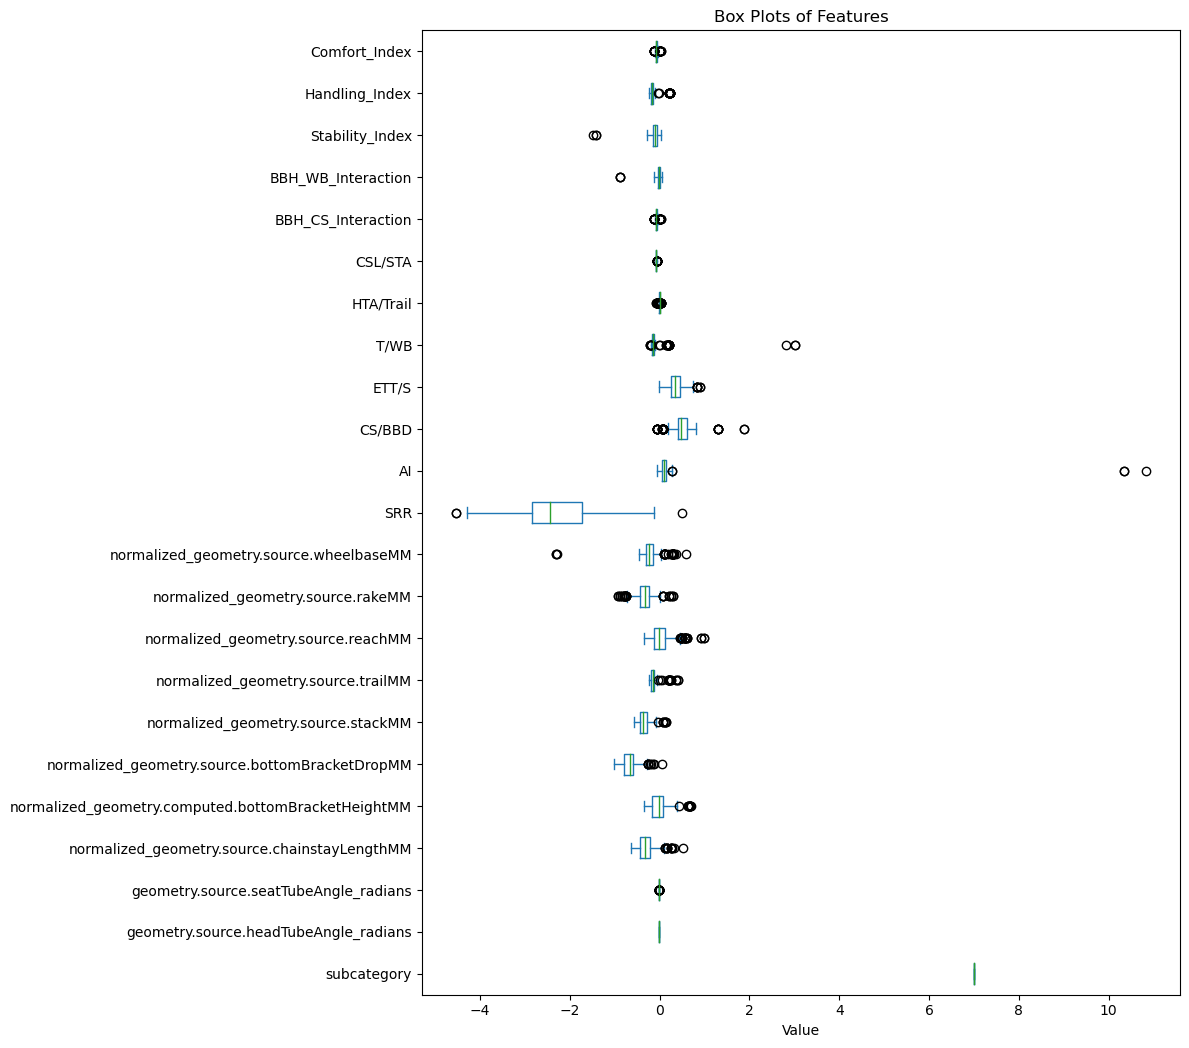

In [13]:
# Basic Statistics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_visualize_statistics(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)
    
    # Get unique subcategories
    subcategories = data['subcategory'].unique()
    
    # Dictionary to store results for each subcategory
    results = {}
    
    # Calculate basic statistics and visualize for each subcategory
    for subcategory in subcategories:
        subcategory_data = data[data['subcategory'] == subcategory]
        stats = subcategory_data.describe().loc[['mean', '50%', 'std', 'min', 'max']]
        stats.rename(index={'50%': 'median'}, inplace=True)
        results[subcategory] = stats
        
        # Number of features
        num_features = subcategory_data.shape[1]
        cols = 5
        rows = int(np.ceil(num_features / cols))
        
        # Plotting
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 4 * rows))
        fig.suptitle(f'Statistics and Distributions for Subcategory {subcategory}', fontsize=16)
        
        # Histograms for each feature
        for i, column in enumerate(subcategory_data.columns):
            ax = plt.subplot(rows, cols, i+1)
            subcategory_data[column].hist(ax=ax, bins=15, alpha=0.75)
            ax.set_title(column)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # Box plots for each feature
        fig, ax = plt.subplots(figsize=(12, 0.5*num_features))
        subcategory_data.plot.box(ax=ax, vert=False)
        ax.set_title('Box Plots of Features')
        ax.set_xlabel('Value')
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    
    return results

# Enter Data:
file_path = 'encoded_road_bikes_2020-2024.csv'  # Replace with the actual path to your CSV file
stats_by_subcategory = calculate_and_visualize_statistics(file_path)
